# THPT 2025 Exam Results Analytics

This notebook analyzes the crawled data from Vietnamese High School Graduation Examination (THPT) 2025 results. We'll explore score distributions, subject performance, and generate comprehensive insights from the collected data.

## Data Overview
- **Source**: CSV files from different crawling sessions
- **Coverage**: Student exam scores across multiple subjects
- **Subjects**: Math (TOAN), Literature (VAN), Foreign Language (NGOAI_NGU), History (SU), Geography (DIA), Physics (LI), Chemistry (HOA), Biology (SINH), IT (TIN_HOC), Civic Education (GIAO_DUC_CONG_DAN), and Technical subjects

## 1. Import Required Libraries

In [19]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path
import glob

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set up figure size defaults
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print("📊 Ready for THPT 2025 data analysis")

✅ All libraries imported successfully!
📊 Ready for THPT 2025 data analysis


## 2. Load and Examine Data

We'll load the CSV files from both crawling sessions and examine their structure.

In [20]:
# Define paths to the CSV files
results_path = Path("results")
csv_files = list(results_path.glob("*/results.csv"))

print(f"📁 Found {len(csv_files)} CSV files:")
for file in csv_files:
    size_mb = file.stat().st_size / (1024 * 1024)
    print(f"   • {file}: {size_mb:.1f} MB")

# Define data types to preserve string columns
dtype_spec = {
    'registration_number': 'str',
    'Id': 'str', 
    'SBD': 'str',
    'TinhId': 'str',
    'MA_MON_NGOAI_NGU': 'str'
}

# Load both CSV files
dataframes = []
session_info = []

for i, csv_file in enumerate(csv_files):
    print(f"\n📊 Loading {csv_file}...")
    # Load with explicit string dtypes for ID columns
    df = pd.read_csv(csv_file, dtype=dtype_spec)
    session_name = csv_file.parent.name
    df['session'] = session_name
    dataframes.append(df)
    session_info.append({
        'session': session_name, 
        'records': len(df),
        'file_size_mb': csv_file.stat().st_size / (1024 * 1024)
    })
    print(f"   ✅ Loaded {len(df):,} records")
    print(f"   📋 Data types for key columns:")
    key_cols = ['registration_number', 'Id', 'SBD'] 
    for col in key_cols:
        if col in df.columns:
            print(f"      • {col}: {df[col].dtype}")

# Combine all data
combined_df = pd.concat(dataframes, ignore_index=True)
print(f"\n🎯 Combined dataset: {len(combined_df):,} total records")

# Display session information
session_df = pd.DataFrame(session_info)
print("\n📋 Session Summary:")
print(session_df)

📁 Found 1 CSV files:
   • results\session_20250719_035149\results.csv: 99.7 MB

📊 Loading results\session_20250719_035149\results.csv...
   ✅ Loaded 1,152,908 records
   📋 Data types for key columns:
      • registration_number: object
      • Id: object
      • SBD: object

🎯 Combined dataset: 1,152,908 total records

📋 Session Summary:
                   session  records  file_size_mb
0  session_20250719_035149  1152908     99.743979


In [21]:
# Examine the data structure
print("📋 Dataset Information:")
print(f"Shape: {combined_df.shape}")
print(f"Columns: {list(combined_df.columns)}")

print("\n📊 Data Types:")
print(combined_df.dtypes)

print("\n🎯 First few records:")
display(combined_df.head())

print("\n📈 Basic Statistics:")
display(combined_df.describe())

# Identify subject columns (score columns)
subject_columns = [
    'TOAN', 'VAN', 'NGOAI_NGU', 'SU', 'DIA', 'GDKT_PL', 
    'LI', 'HOA', 'SINH', 'TIN_HOC', 'GIAO_DUC_CONG_DAN',
    'CN_CONG_NGHIEP', 'CN_NONG_NGHIEP'
]

print(f"\n🎓 Subject columns identified: {len(subject_columns)}")
for col in subject_columns:
    if col in combined_df.columns:
        non_null_count = combined_df[col].notna().sum()
        print(f"   • {col}: {non_null_count:,} records")
    else:
        print(f"   ⚠️ {col}: Not found in dataset")

📋 Dataset Information:
Shape: (1152908, 23)
Columns: ['registration_number', 'timestamp', 'total_subjects', 'source', 'Id', 'TinhId', 'MA_MON_NGOAI_NGU', 'SBD', 'TONGDIEM', 'TOAN', 'VAN', 'NGOAI_NGU', 'SU', 'DIA', 'GDKT_PL', 'LI', 'HOA', 'SINH', 'TIN_HOC', 'GIAO_DUC_CONG_DAN', 'CN_CONG_NGHIEP', 'CN_NONG_NGHIEP', 'session']

📊 Data Types:
registration_number     object
timestamp               object
total_subjects           int64
source                  object
Id                      object
TinhId                  object
MA_MON_NGOAI_NGU        object
SBD                     object
TONGDIEM               float64
TOAN                   float64
VAN                    float64
NGOAI_NGU              float64
SU                     float64
DIA                    float64
GDKT_PL                float64
LI                     float64
HOA                    float64
SINH                   float64
TIN_HOC                float64
GIAO_DUC_CONG_DAN      float64
CN_CONG_NGHIEP         float64
CN_NONG_N

,registration_number,timestamp,total_subjects,source,Id,TinhId,MA_MON_NGOAI_NGU,SBD,TONGDIEM,TOAN,VAN,NGOAI_NGU,SU,DIA,GDKT_PL,LI,HOA,SINH,TIN_HOC,GIAO_DUC_CONG_DAN,CN_CONG_NGHIEP,CN_NONG_NGHIEP,session
0,01000001,2025-07-19 03:51:49,4,api,01000001,1,NaN,01000001,29.50,5.75,7.75,NaN,NaN,NaN,NaN,NaN,7.75,8.25,NaN,NaN,NaN,NaN,session_20250719_035149
1,01000002,2025-07-19 03:51:49,4,api,01000002,1,NaN,01000002,31.50,8.00,8.25,NaN,NaN,NaN,NaN,8.50,6.75,NaN,NaN,NaN,NaN,NaN,session_20250719_035149
2,01000003,2025-07-19 03:51:49,3,api,01000003,1,NaN,01000003,24.00,6.75,8.50,NaN,NaN,NaN,NaN,8.75,NaN,NaN,NaN,NaN,NaN,NaN,session_20250719_035149
3,01000004,2025-07-19 03:51:49,4,api,01000004,1,NaN,01000004,24.75,5.25,7.50,NaN,NaN,NaN,NaN,6.50,5.50,NaN,NaN,NaN,NaN,NaN,session_20250719_035149
4,01000005,2025-07-19 03:51:49,3,api,01000005,1,NaN,01000005,18.75,NaN,7.00,NaN,5.5,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,session_20250719_035149



📈 Basic Statistics:


,total_subjects,TONGDIEM,TOAN,VAN,NGOAI_NGU,SU,DIA,GDKT_PL,LI,HOA,SINH,TIN_HOC,GIAO_DUC_CONG_DAN,CN_CONG_NGHIEP,CN_NONG_NGHIEP
count,1.152908e+06,1.152908e+06,1.137268e+06,1.143938e+06,362944.000000,495080.000000,489507.000000,246371.000000,351696.000000,244242.000000,71602.000000,7601.000000,4096.000000,2288.000000,22038.000000
mean,3.971411e+00,2.463913e+01,4.799756e+00,6.990459e+00,5.406329,6.514920,6.642938,7.691392,6.978477,6.069822,5.780548,6.782700,7.696594,5.794296,7.716013
std,2.016636e-01,4.649889e+00,1.688544e+00,1.291049e+00,1.487622,1.644285,1.750107,1.180876,1.521606,1.812256,1.594082,1.482821,1.532284,1.539403,1.170284
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.250000,0.000000,0.000000,0.000000,1.350000,0.000000,2.300000,1.550000
25%,4.000000e+00,2.160000e+01,3.550000e+00,6.250000e+00,4.250000,5.250000,5.350000,7.000000,5.850000,4.750000,4.600000,5.750000,7.000000,4.587500,7.000000
50%,4.000000e+00,2.480000e+01,4.600000e+00,7.250000e+00,5.250000,6.500000,6.750000,7.750000,7.000000,6.000000,5.750000,6.750000,8.000000,5.600000,7.750000
75%,4.000000e+00,2.785000e+01,5.850000e+00,8.000000e+00,6.250000,7.750000,8.000000,8.500000,8.250000,7.500000,7.000000,7.850000,8.750000,7.000000,8.500000
max,6.000000e+00,5.200000e+01,1.000000e+01,9.750000e+00,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000



🎓 Subject columns identified: 13
   • TOAN: 1,137,268 records
   • VAN: 1,143,938 records
   • NGOAI_NGU: 362,944 records
   • SU: 495,080 records
   • DIA: 489,507 records
   • GDKT_PL: 246,371 records
   • LI: 351,696 records
   • HOA: 244,242 records
   • SINH: 71,602 records
   • TIN_HOC: 7,601 records
   • GIAO_DUC_CONG_DAN: 4,096 records
   • CN_CONG_NGHIEP: 2,288 records
   • CN_NONG_NGHIEP: 22,038 records


## 3. Data Cleaning and Preprocessing

Clean the data by handling missing values and preparing subject scores for analysis.

In [22]:
# Create a clean copy of the data
df_clean = combined_df.copy()

# Convert subject scores to numeric, handling any non-numeric values
print("🧹 Cleaning subject score data...")

# Filter subject columns that exist in the dataset
existing_subjects = [col for col in subject_columns if col in df_clean.columns]
print(f"📊 Found {len(existing_subjects)} subject columns: {existing_subjects}")

# Convert scores to numeric
for subject in existing_subjects:
    df_clean[subject] = pd.to_numeric(df_clean[subject], errors='coerce')

# Remove duplicate registrations (keep first occurrence)
print(f"\n🔍 Checking for duplicates...")
before_dedup = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['SBD'], keep='first')
after_dedup = len(df_clean)
print(f"   Removed {before_dedup - after_dedup:,} duplicate records")

# Filter students with at least one valid score
students_with_scores = df_clean[existing_subjects].notna().any(axis=1)
df_clean = df_clean[students_with_scores]
print(f"   Filtered to {len(df_clean):,} students with at least one valid score")

# Create subject-wise statistics
print("\n📈 Missing data analysis:")
missing_stats = []
for subject in existing_subjects:
    total_records = len(df_clean)
    valid_scores = df_clean[subject].notna().sum()
    missing_pct = ((total_records - valid_scores) / total_records) * 100
    missing_stats.append({
        'Subject': subject,
        'Valid_Scores': valid_scores,
        'Missing_Count': total_records - valid_scores,
        'Missing_Percentage': missing_pct
    })

missing_df = pd.DataFrame(missing_stats)
display(missing_df)

🧹 Cleaning subject score data...
📊 Found 13 subject columns: ['TOAN', 'VAN', 'NGOAI_NGU', 'SU', 'DIA', 'GDKT_PL', 'LI', 'HOA', 'SINH', 'TIN_HOC', 'GIAO_DUC_CONG_DAN', 'CN_CONG_NGHIEP', 'CN_NONG_NGHIEP']

🔍 Checking for duplicates...
   Removed 0 duplicate records
   Filtered to 1,152,908 students with at least one valid score

📈 Missing data analysis:


,Subject,Valid_Scores,Missing_Count,Missing_Percentage
0,TOAN,1137268,15640,1.356570
1,VAN,1143938,8970,0.778033
2,NGOAI_NGU,362944,789964,68.519257
3,SU,495080,657828,57.058152
4,DIA,489507,663401,57.541538
5,GDKT_PL,246371,906537,78.630472
6,LI,351696,801212,69.494877
7,HOA,244242,908666,78.815135
8,SINH,71602,1081306,93.789444
9,TIN_HOC,7601,1145307,99.340711


## 4. Subject Score Distribution Analysis

Analyze the distribution of scores for each subject and calculate statistical measures.

In [23]:
# Calculate comprehensive statistics for each subject
print("📊 Calculating subject statistics...")

subject_stats = []
for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        stats = {
            'Subject': subject,
            'Count': len(scores),
            'Mean': scores.mean(),
            'Median': scores.median(),
            'Std': scores.std(),
            'Min': scores.min(),
            'Max': scores.max(),
            'Q1': scores.quantile(0.25),
            'Q3': scores.quantile(0.75),
            'Perfect_Scores': (scores == 10).sum(),
            'Zero_Scores': (scores == 0).sum()
        }
        subject_stats.append(stats)

# Create statistics DataFrame
stats_df = pd.DataFrame(subject_stats)
stats_df = stats_df.round(2)

print("📈 Subject Performance Statistics:")
display(stats_df)

# Calculate subject performance ranking
stats_df['Avg_Rank'] = stats_df['Mean'].rank(ascending=False)
stats_df_sorted = stats_df.sort_values('Mean', ascending=False)

print("\n🏆 Subject Ranking by Average Score:")
display(stats_df_sorted[['Subject', 'Mean', 'Count', 'Perfect_Scores']])

📊 Calculating subject statistics...
📈 Subject Performance Statistics:


,Subject,Count,Mean,Median,Std,Min,Max,Q1,Q3,Perfect_Scores,Zero_Scores
0,TOAN,1137268,4.80,4.60,1.69,0.00,10.00,3.55,5.85,513,7
1,VAN,1143938,6.99,7.25,1.29,0.00,9.75,6.25,8.00,0,10
2,NGOAI_NGU,362944,5.41,5.25,1.49,0.00,10.00,4.25,6.25,417,2
3,SU,495080,6.51,6.50,1.64,0.00,10.00,5.25,7.75,1646,9
4,DIA,489507,6.64,6.75,1.75,0.00,10.00,5.35,8.00,7022,13
5,GDKT_PL,246371,7.69,7.75,1.18,1.25,10.00,7.00,8.50,1451,0
6,LI,351696,6.98,7.00,1.52,0.00,10.00,5.85,8.25,3929,4
7,HOA,244242,6.07,6.00,1.81,0.00,10.00,4.75,7.50,627,3
8,SINH,71602,5.78,5.75,1.59,0.00,10.00,4.60,7.00,84,12
9,TIN_HOC,7601,6.78,6.75,1.48,1.35,10.00,5.75,7.85,60,0



🏆 Subject Ranking by Average Score:


,Subject,Mean,Count,Perfect_Scores
12,CN_NONG_NGHIEP,7.72,22038,101
10,GIAO_DUC_CONG_DAN,7.70,4096,34
5,GDKT_PL,7.69,246371,1451
1,VAN,6.99,1143938,0
6,LI,6.98,351696,3929
9,TIN_HOC,6.78,7601,60
4,DIA,6.64,489507,7022
3,SU,6.51,495080,1646
7,HOA,6.07,244242,627
11,CN_CONG_NGHIEP,5.79,2288,4


## 5. Score Frequency Visualization

Create histograms and bar plots showing the frequency of each score for different subjects.


📊 Creating score frequency plots for all subjects...


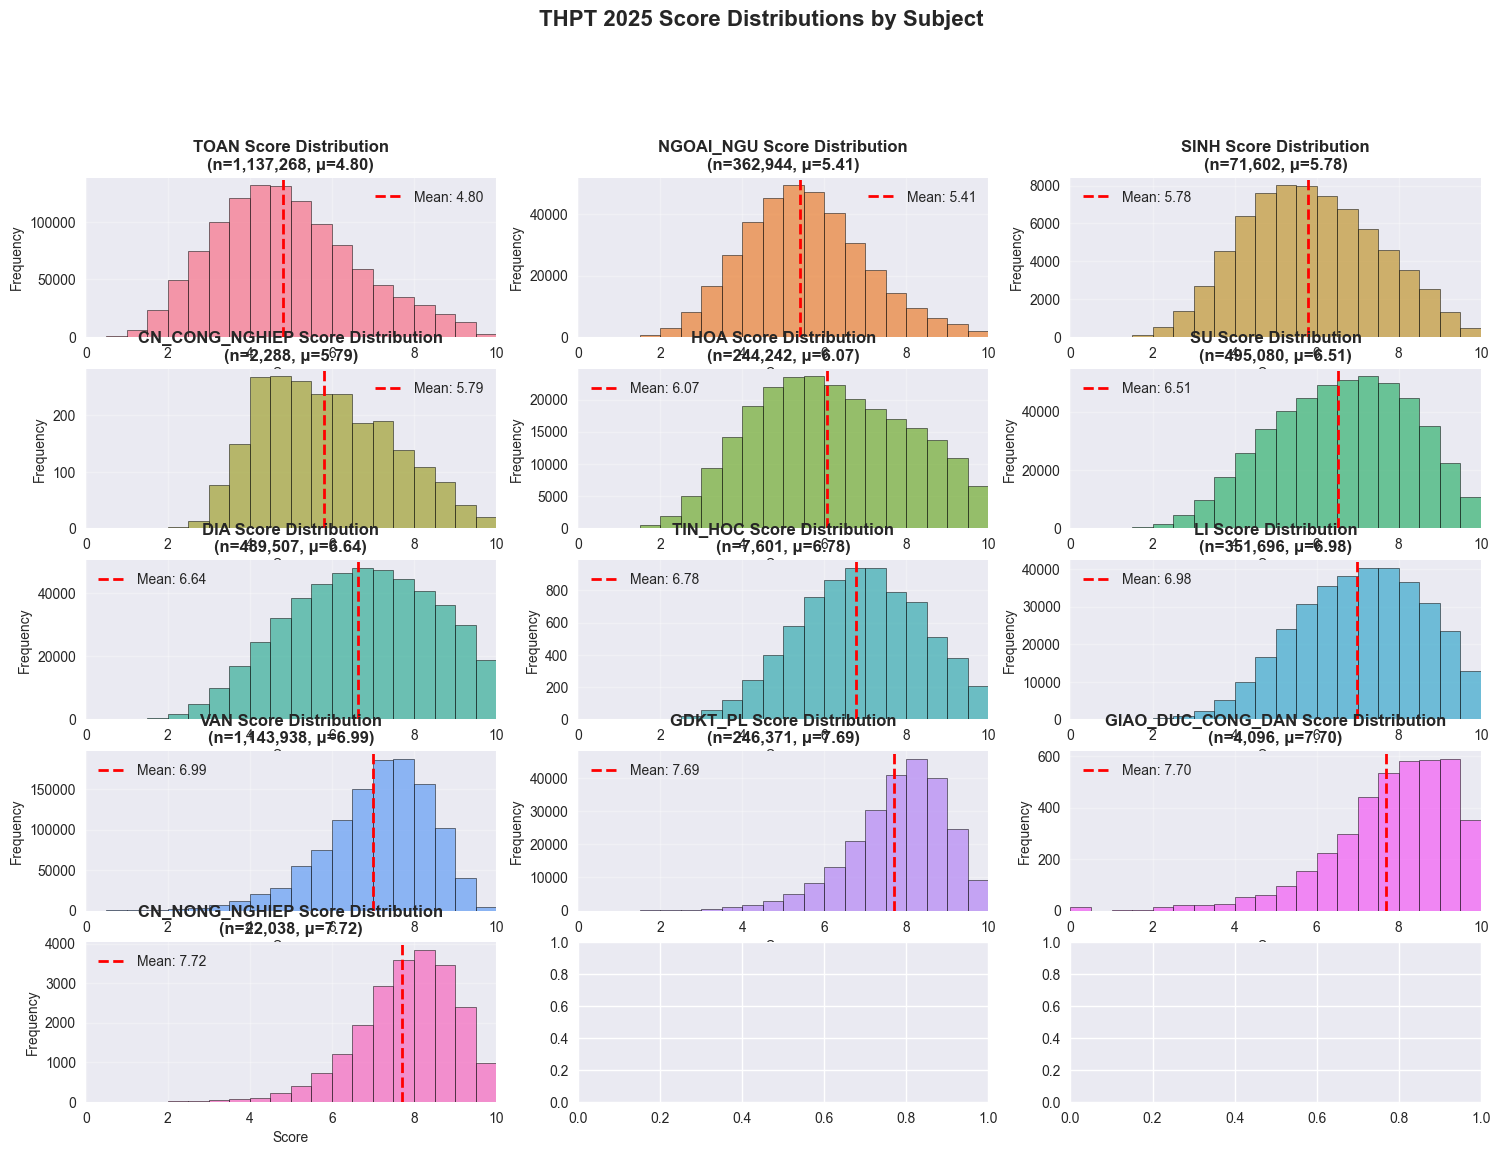


📈 Detailed Score Frequency Analysis - Mathematics (TOAN):


,Score,Frequency,Percentage
0,0.00,8,0.00
1,0.25,2,0.00
2,0.50,52,0.00
3,0.75,288,0.03
4,1.00,1185,0.10
5,1.25,3520,0.31
6,1.50,7869,0.69
7,1.75,13446,1.18
8,2.00,20104,1.77
9,2.25,27537,2.42


In [24]:
# Create score frequency analysis for all subjects
print("\n📊 Creating score frequency plots for all subjects...")
top_subjects = stats_df_sorted.sort_values('Mean', ascending=True)['Subject'].tolist()


# Create subplots for score distributions
fig, axes = plt.subplots(5, 3, figsize=(18, 12))
# Adjust the number of subplots based on the number of subjects
axes = axes.flatten()

for i, subject in enumerate(top_subjects):
    scores = df_clean[subject].dropna()
    
    # Create histogram
    ax = axes[i]
    bins = np.arange(0, 11, 0.5)  # Score bins from 0 to 10
    ax.hist(scores, bins=bins, alpha=0.7, color=sns.color_palette("husl", len(top_subjects))[i], 
            edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{subject} Score Distribution\n(n={len(scores):,}, μ={scores.mean():.2f})', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Score', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_xlim(0, 10)
    ax.grid(True, alpha=0.3)
    
    # Add mean line
    ax.axvline(scores.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {scores.mean():.2f}')
    ax.legend()


plt.suptitle('THPT 2025 Score Distributions by Subject', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Create detailed score frequency table for a specific subject (e.g., Math)
if 'TOAN' in existing_subjects:
    print("\n📈 Detailed Score Frequency Analysis - Mathematics (TOAN):")
    math_scores = df_clean['TOAN'].dropna()
    
    # Round scores to nearest 0.25 for frequency analysis
    rounded_scores = (math_scores * 4).round() / 4
    score_freq = rounded_scores.value_counts().sort_index()
    
    score_freq_df = pd.DataFrame({
        'Score': score_freq.index,
        'Frequency': score_freq.values,
        'Percentage': (score_freq.values / len(math_scores) * 100).round(2)
    })
    
    display(score_freq_df)

## 6. Statistical Summary by Subject

Generate comprehensive statistical summaries including quartiles, percentiles, and grade distributions.

In [25]:
# Create grade categories and analyze performance levels
def categorize_score(score):
    """Categorize scores into performance levels"""
    if pd.isna(score):
        return 'No Score'
    elif score >= 8.5:
        return 'Excellent (8.5-10)'
    elif score >= 7.0:
        return 'Good (7.0-8.4)'
    elif score >= 5.5:
        return 'Average (5.5-6.9)'
    elif score >= 4.0:
        return 'Below Average (4.0-5.4)'
    else:
        return 'Poor (0-3.9)'

# Analyze grade distributions for each subject
print("🎯 Grade Distribution Analysis:")
grade_analysis = []

for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        # Categorize scores
        categories = scores.apply(categorize_score).value_counts()
        
        analysis = {
            'Subject': subject,
            'Total_Students': len(scores),
            'Excellent': categories.get('Excellent (8.5-10)', 0),
            'Good': categories.get('Good (7.0-8.4)', 0),
            'Average': categories.get('Average (5.5-6.9)', 0),
            'Below_Average': categories.get('Below Average (4.0-5.4)', 0),
            'Poor': categories.get('Poor (0-3.9)', 0)
        }
        
        # Calculate percentages
        for grade in ['Excellent', 'Good', 'Average', 'Below_Average', 'Poor']:
            analysis[f'{grade}_Pct'] = (analysis[grade] / analysis['Total_Students']) * 100
        
        grade_analysis.append(analysis)

grade_df = pd.DataFrame(grade_analysis)

# Display count and percentage tables
print("📊 Grade Distribution (Count):")
display(grade_df[['Subject', 'Total_Students', 'Excellent', 'Good', 'Average', 'Below_Average', 'Poor']])

print("\n📈 Grade Distribution (Percentage):")
percentage_cols = ['Subject', 'Excellent_Pct', 'Good_Pct', 'Average_Pct', 'Below_Average_Pct', 'Poor_Pct']
display(grade_df[percentage_cols].round(2))

# Calculate percentiles for detailed analysis
print("\n📐 Percentile Analysis:")
percentile_analysis = []

for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        percentiles = {
            'Subject': subject,
            'P10': scores.quantile(0.10),
            'P25': scores.quantile(0.25),
            'P50': scores.quantile(0.50),  # Median
            'P75': scores.quantile(0.75),
            'P90': scores.quantile(0.90),
            'P95': scores.quantile(0.95),
            'P99': scores.quantile(0.99)
        }
        percentile_analysis.append(percentiles)

percentile_df = pd.DataFrame(percentile_analysis).round(2)
display(percentile_df)

🎯 Grade Distribution Analysis:
📊 Grade Distribution (Count):


,Subject,Total_Students,Excellent,Good,Average,Below_Average,Poor
0,TOAN,1137268,36350,107672,237151,381441,374654
1,VAN,1143938,147341,530784,337340,102485,25988
2,NGOAI_NGU,362944,12798,45412,117929,131794,55011
3,SU,495080,69846,146704,144935,100131,33464
4,DIA,489507,91882,132008,136802,95006,33809
5,GDKT_PL,246371,75152,117436,42385,9746,1652
6,LI,351696,71212,117276,104404,50395,8409
7,HOA,244242,31776,50985,66017,64423,31041
8,SINH,71602,4379,13835,22151,21991,9246
9,TIN_HOC,7601,1155,2460,2553,1223,210



📈 Grade Distribution (Percentage):


,Subject,Excellent_Pct,Good_Pct,Average_Pct,Below_Average_Pct,Poor_Pct
0,TOAN,3.20,9.47,20.85,33.54,32.94
1,VAN,12.88,46.40,29.49,8.96,2.27
2,NGOAI_NGU,3.53,12.51,32.49,36.31,15.16
3,SU,14.11,29.63,29.28,20.23,6.76
4,DIA,18.77,26.97,27.95,19.41,6.91
5,GDKT_PL,30.50,47.67,17.20,3.96,0.67
6,LI,20.25,33.35,29.69,14.33,2.39
7,HOA,13.01,20.87,27.03,26.38,12.71
8,SINH,6.12,19.32,30.94,30.71,12.91
9,TIN_HOC,15.20,32.36,33.59,16.09,2.76



📐 Percentile Analysis:


,Subject,P10,P25,P50,P75,P90,P95,P99
0,TOAN,2.70,3.55,4.60,5.85,7.25,8.00,9.00
1,VAN,5.25,6.25,7.25,8.00,8.50,8.75,9.25
2,NGOAI_NGU,3.50,4.25,5.25,6.25,7.50,8.00,9.25
3,SU,4.25,5.25,6.50,7.75,8.75,9.00,9.75
4,DIA,4.25,5.35,6.75,8.00,9.00,9.50,10.00
5,GDKT_PL,6.10,7.00,7.75,8.50,9.00,9.25,9.75
6,LI,5.00,5.85,7.00,8.25,9.00,9.25,10.00
7,HOA,3.75,4.75,6.00,7.50,8.75,9.25,9.75
8,SINH,3.75,4.60,5.75,7.00,8.00,8.50,9.25
9,TIN_HOC,4.85,5.75,6.75,7.85,8.75,9.25,9.75


## 7. Comparative Analysis Across Subjects

Create box plots and violin plots to compare score distributions across different subjects.

📊 Creating comparative visualizations...


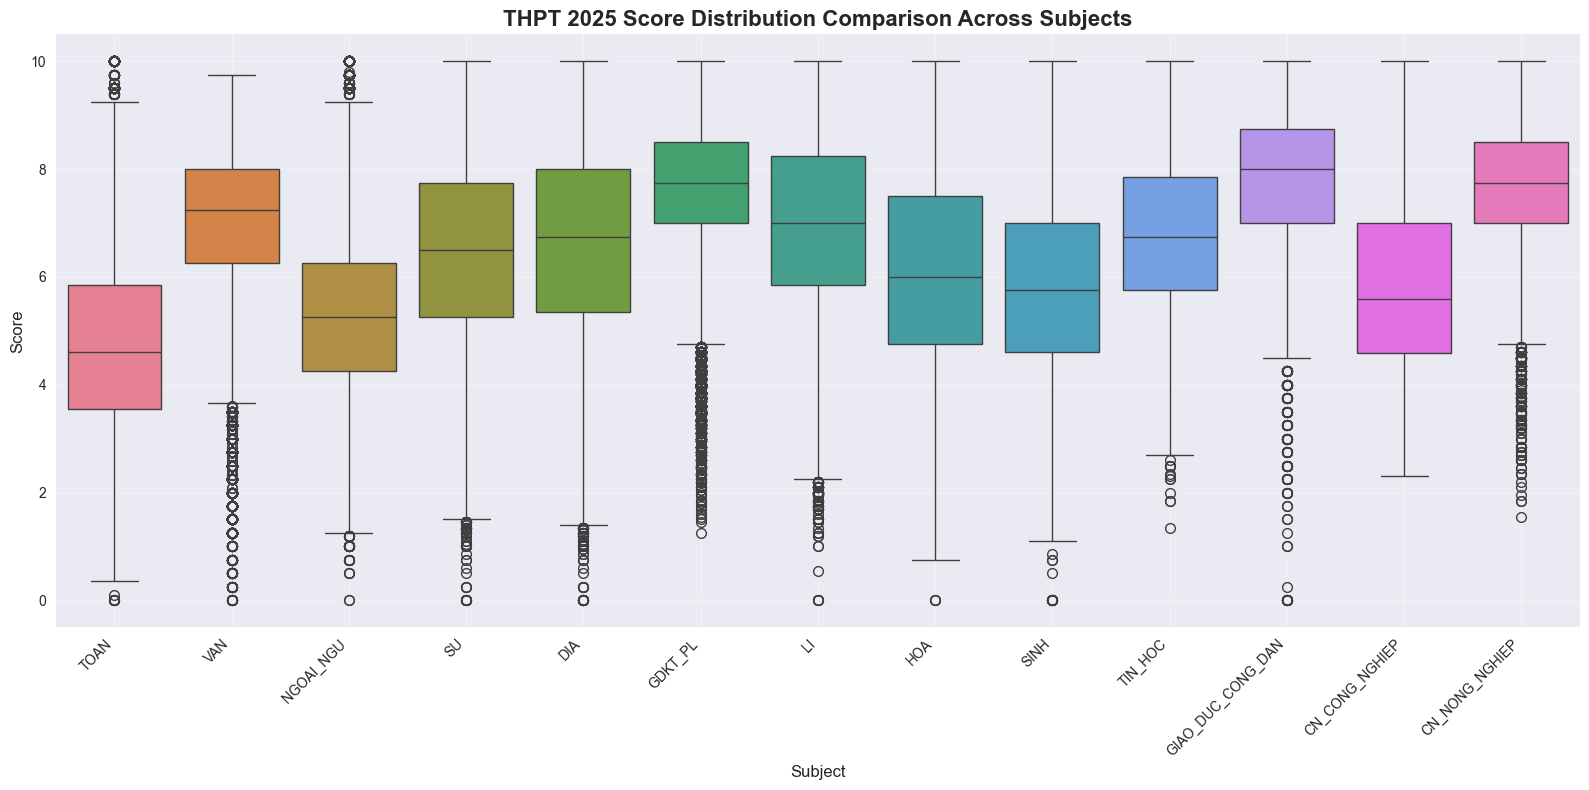

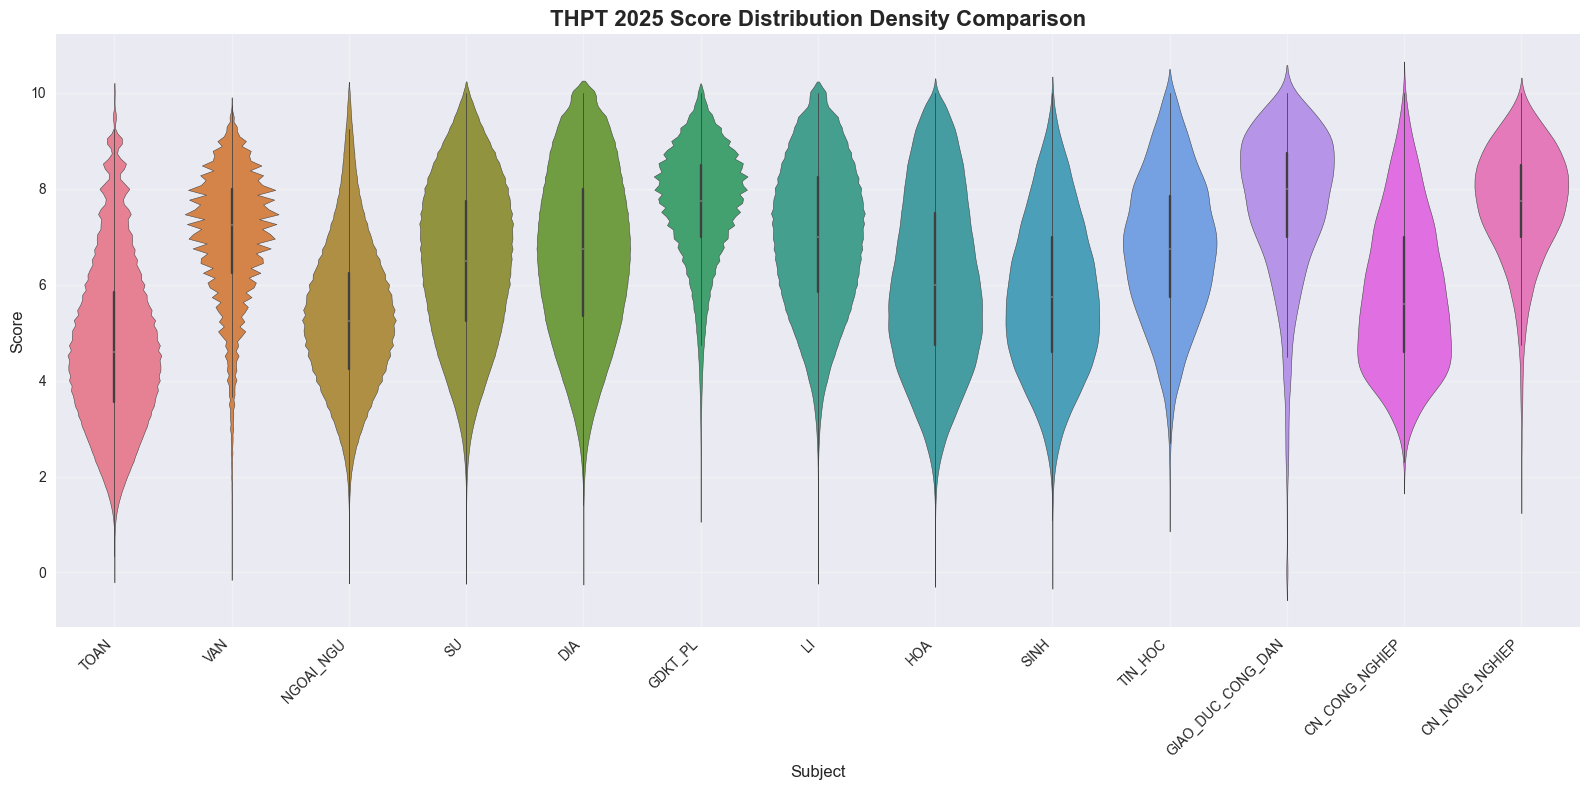

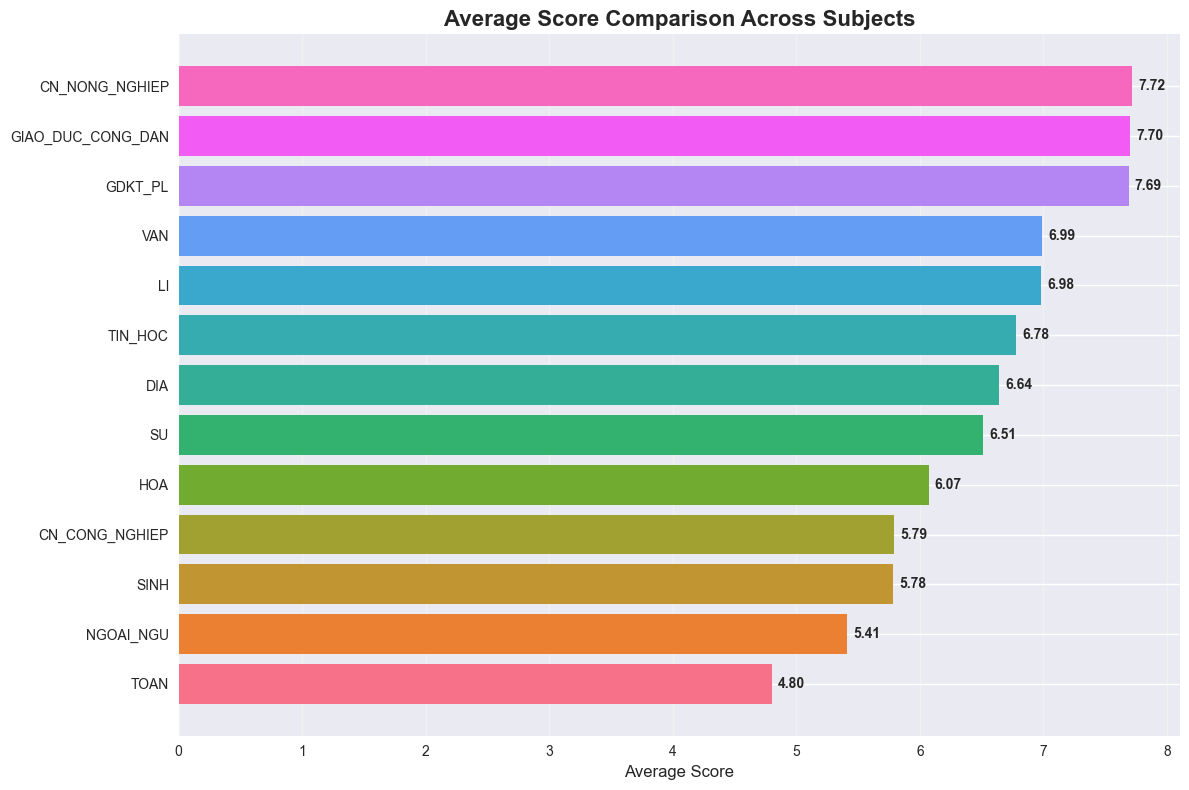

In [26]:
# Create comparative box plots
print("📊 Creating comparative visualizations...")

# Prepare data for box plot
box_plot_data = []
for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    for score in scores:
        box_plot_data.append({'Subject': subject, 'Score': score})

box_df = pd.DataFrame(box_plot_data)

# Create box plot
plt.figure(figsize=(16, 8))
sns.boxplot(data=box_df, x='Subject', y='Score', palette='husl')
plt.title('THPT 2025 Score Distribution Comparison Across Subjects', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create violin plot for detailed distribution comparison
plt.figure(figsize=(16, 8))
sns.violinplot(data=box_df, x='Subject', y='Score', palette='husl')
plt.title('THPT 2025 Score Distribution Density Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create mean score comparison
mean_scores = stats_df.set_index('Subject')['Mean'].sort_values(ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(mean_scores)), mean_scores.values, 
                color=sns.color_palette("husl", len(mean_scores)))
plt.yticks(range(len(mean_scores)), mean_scores.index)
plt.xlabel('Average Score', fontsize=12)
plt.title('Average Score Comparison Across Subjects', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, v in enumerate(mean_scores.values):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Grade Distribution Heatmap

Create a heatmap visualization showing the distribution of scores across subjects and grade ranges.

🔥 Creating grade distribution heatmap...


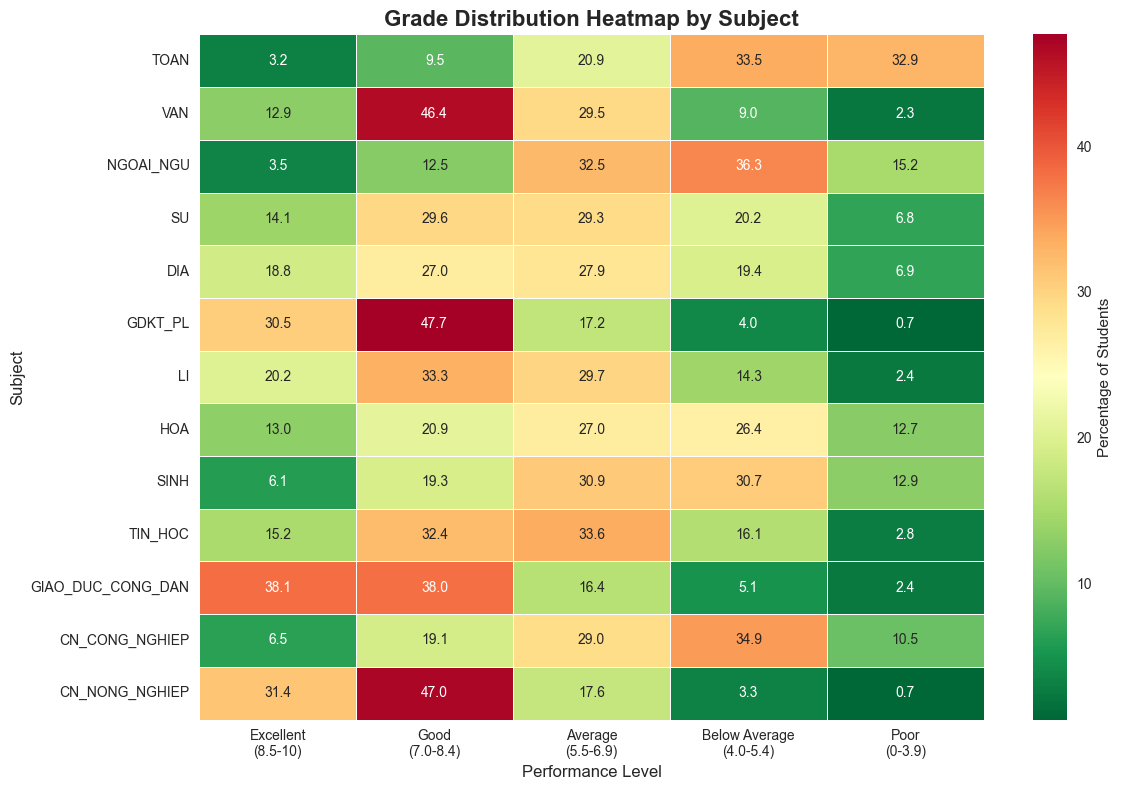

📊 Creating score range frequency heatmap...


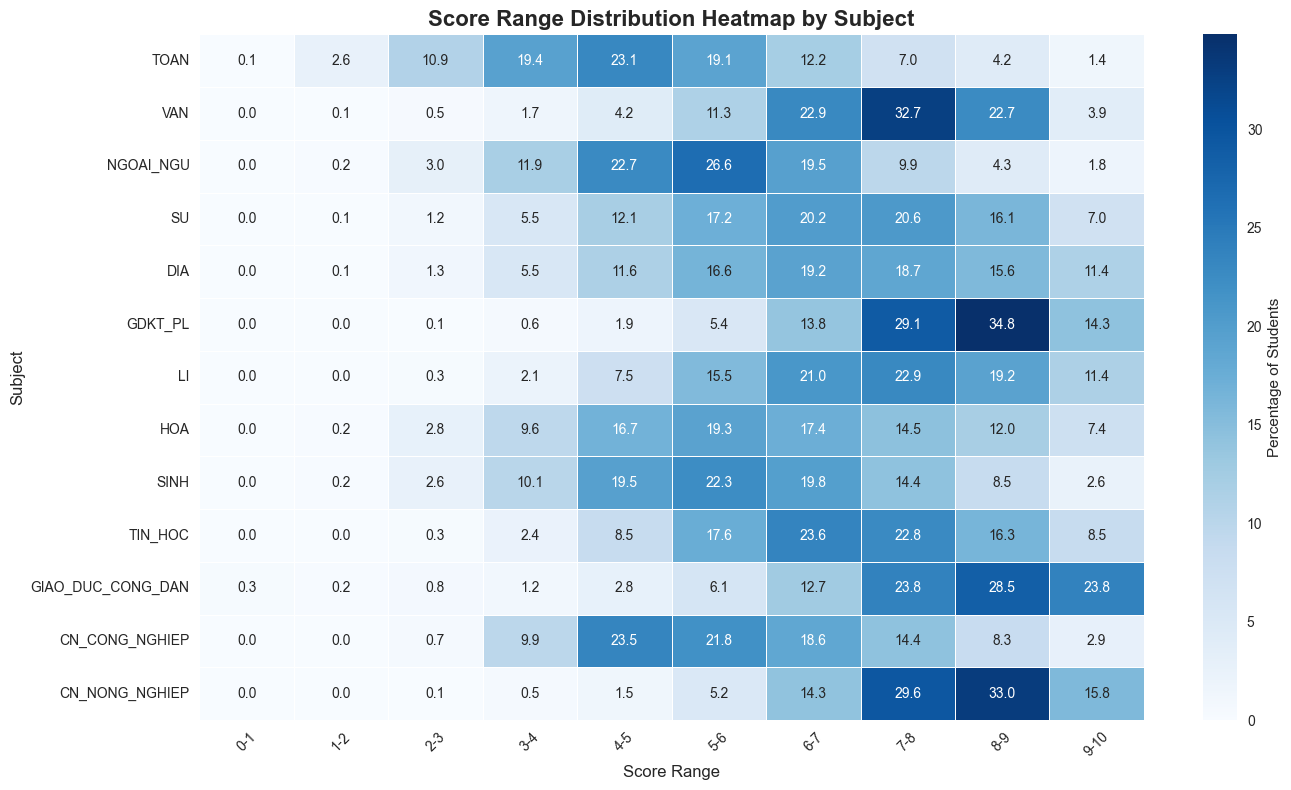

In [27]:
# Create heatmap of grade distributions
print("🔥 Creating grade distribution heatmap...")

# Prepare percentage data for heatmap
heatmap_data = grade_df.set_index('Subject')[['Excellent_Pct', 'Good_Pct', 'Average_Pct', 'Below_Average_Pct', 'Poor_Pct']]
heatmap_data.columns = ['Excellent\n(8.5-10)', 'Good\n(7.0-8.4)', 'Average\n(5.5-6.9)', 'Below Average\n(4.0-5.4)', 'Poor\n(0-3.9)']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Percentage of Students'}, 
            linewidths=0.5, linecolor='white')
plt.title('Grade Distribution Heatmap by Subject', fontsize=16, fontweight='bold')
plt.xlabel('Performance Level', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Create score range frequency heatmap
print("📊 Creating score range frequency heatmap...")

# Define score ranges
score_ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
range_data = []

for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        range_counts = {}
        for i, range_label in enumerate(score_ranges):
            lower = i
            upper = i + 1
            count = ((scores >= lower) & (scores < upper)).sum()
            if i == len(score_ranges) - 1:  # Last range includes 10
                count = ((scores >= lower) & (scores <= upper)).sum()
            range_counts[range_label] = (count / len(scores)) * 100
        
        range_counts['Subject'] = subject
        range_data.append(range_counts)

range_df = pd.DataFrame(range_data).set_index('Subject')

# Create score range heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(range_df, annot=True, fmt='.1f', cmap='Blues',
            cbar_kws={'label': 'Percentage of Students'},
            linewidths=0.5, linecolor='white')
plt.title('Score Range Distribution Heatmap by Subject', fontsize=16, fontweight='bold')
plt.xlabel('Score Range', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 9. Top Performers Analysis

Identify and analyze students with highest scores, perfect scores, and overall top performers across subjects.

In [28]:
# Analyze top performers and perfect scores
print("🏆 Top Performers Analysis")

# Perfect scores analysis
perfect_score_analysis = []
for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        perfect_count = (scores == 10).sum()
        perfect_rate = (perfect_count / len(scores)) * 100
        perfect_score_analysis.append({
            'Subject': subject,
            'Perfect_Scores': perfect_count,
            'Total_Students': len(scores),
            'Perfect_Rate_Pct': perfect_rate
        })

perfect_df = pd.DataFrame(perfect_score_analysis).sort_values('Perfect_Rate_Pct', ascending=False)
print("📊 Perfect Score (10.0) Analysis:")
display(perfect_df)

# Find students with multiple perfect scores
print("\n🌟 Students with Multiple Perfect Scores:")
student_perfect_scores = {}

for subject in existing_subjects:
    perfect_students = df_clean[df_clean[subject] == 10]['SBD'].tolist()
    for student in perfect_students:
        if student not in student_perfect_scores:
            student_perfect_scores[student] = []
        student_perfect_scores[student].append(subject)

# Filter students with 2+ perfect scores
multi_perfect = {k: v for k, v in student_perfect_scores.items() if len(v) >= 2}

if multi_perfect:
    multi_perfect_df = pd.DataFrame([
        {'Student_ID': k, 'Perfect_Subjects': ', '.join(v), 'Count': len(v)}
        for k, v in multi_perfect.items()
    ]).sort_values('Count', ascending=False)
    print(f"Found {len(multi_perfect)} students with multiple perfect scores:")
    display(multi_perfect_df.head(10))
else:
    print("No students found with multiple perfect scores.")

# High achievers analysis (students with average >= 8.5)
print("\n🎯 High Achievers Analysis (Average ≥ 8.5):")
df_scores = df_clean[existing_subjects]
df_scores['Student_Average'] = df_scores.mean(axis=1, skipna=True)
df_scores['Valid_Subjects'] = df_scores[existing_subjects].notna().sum(axis=1)

# Filter students with at least 3 subjects and average >= 8.5
high_achievers = df_scores[
    (df_scores['Valid_Subjects'] >= 3) & 
    (df_scores['Student_Average'] >= 8.5)
].copy()

if not high_achievers.empty:
    high_achievers_summary = df_clean.loc[high_achievers.index, ['SBD']].copy()
    high_achievers_summary['Average_Score'] = high_achievers['Student_Average']
    high_achievers_summary['Subject_Count'] = high_achievers['Valid_Subjects']
    
    high_achievers_summary = high_achievers_summary.sort_values('Average_Score', ascending=False)
    print(f"Found {len(high_achievers_summary)} high achievers:")
    display(high_achievers_summary.head(20))
    
    # Distribution of high achievers
    print(f"\n📈 High Achiever Score Distribution:")
    print(f"Average score range: {high_achievers_summary['Average_Score'].min():.2f} - {high_achievers_summary['Average_Score'].max():.2f}")
    print(f"Median score: {high_achievers_summary['Average_Score'].median():.2f}")
else:
    print("No high achievers found with the specified criteria.")

# Subject difficulty analysis based on score distributions
print("\n📚 Subject Difficulty Analysis (Based on Score Distribution):")
difficulty_analysis = []

for subject in existing_subjects:
    scores = df_clean[subject].dropna()
    if len(scores) > 0:
        difficulty_metrics = {
            'Subject': subject,
            'Mean_Score': scores.mean(),
            'Std_Dev': scores.std(),
            'Fail_Rate_Pct': ((scores < 5.0).sum() / len(scores)) * 100,
            'Excellence_Rate_Pct': ((scores >= 8.5).sum() / len(scores)) * 100,
            'Difficulty_Index': (10 - scores.mean()) + (scores.std() * 0.5)  # Custom difficulty metric
        }
        difficulty_analysis.append(difficulty_metrics)

difficulty_df = pd.DataFrame(difficulty_analysis).round(2)
difficulty_df = difficulty_df.sort_values('Difficulty_Index', ascending=False)

print("📊 Subject Difficulty Ranking (Higher = More Difficult):")
display(difficulty_df)

🏆 Top Performers Analysis
📊 Perfect Score (10.0) Analysis:


,Subject,Perfect_Scores,Total_Students,Perfect_Rate_Pct
4,DIA,7022,489507,1.434505
6,LI,3929,351696,1.117158
10,GIAO_DUC_CONG_DAN,34,4096,0.830078
9,TIN_HOC,60,7601,0.789370
5,GDKT_PL,1451,246371,0.588949
12,CN_NONG_NGHIEP,101,22038,0.458299
3,SU,1646,495080,0.332472
7,HOA,627,244242,0.256713
11,CN_CONG_NGHIEP,4,2288,0.174825
8,SINH,84,71602,0.117315



🌟 Students with Multiple Perfect Scores:
Found 585 students with multiple perfect scores:


,Student_ID,Perfect_Subjects,Count
73,26006704,"TOAN, LI, HOA",3
17,01090033,"TOAN, LI, HOA",3
10,01035718,"TOAN, LI, HOA",3
78,27008094,"TOAN, LI, HOA",3
49,19000453,"TOAN, LI, HOA",3
41,15000339,"TOAN, LI, HOA",3
127,52003076,"TOAN, LI, HOA",3
75,26012810,"TOAN, LI, HOA",3
23,02048250,"TOAN, HOA, SINH",3
9,01029615,"TOAN, LI",2



🎯 High Achievers Analysis (Average ≥ 8.5):
Found 20919 high achievers:


,SBD,Average_Score,Subject_Count
770512,37018344,9.916667,3
138483,02015603,9.916667,3
661626,29039880,9.812500,4
524564,25004003,9.750000,4
16639,01016799,9.750000,4
661604,29039857,9.750000,3
580750,27012597,9.750000,3
1137031,62007572,9.750000,3
661660,29039920,9.687500,4
35318,01035718,9.687500,4



📈 High Achiever Score Distribution:
Average score range: 8.50 - 9.92
Median score: 8.69

📚 Subject Difficulty Analysis (Based on Score Distribution):
📊 Subject Difficulty Ranking (Higher = More Difficult):


,Subject,Mean_Score,Std_Dev,Fail_Rate_Pct,Excellence_Rate_Pct,Difficulty_Index
0,TOAN,4.80,1.69,56.06,3.20,6.04
2,NGOAI_NGU,5.41,1.49,37.88,3.53,5.34
8,SINH,5.78,1.59,32.44,6.12,5.02
11,CN_CONG_NGHIEP,5.79,1.54,34.00,6.47,4.98
7,HOA,6.07,1.81,29.44,13.01,4.84
3,SU,6.51,1.64,18.84,14.11,4.31
4,DIA,6.64,1.75,18.47,18.77,4.23
9,TIN_HOC,6.78,1.48,11.22,15.20,3.96
6,LI,6.98,1.52,9.91,20.25,3.78
1,VAN,6.99,1.29,6.47,12.88,3.66


## 10. Summary and Key Insights

Let's summarize the key findings from our comprehensive analysis of THPT 2025 exam results.

In [29]:
# Generate comprehensive summary report
print("📋 THPT 2025 EXAM RESULTS - COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 60)

# Dataset overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total student records analyzed: {len(df_clean):,}")
print(f"• Data sources: {len(csv_files)} CSV files")
print(f"• Subjects covered: {len(existing_subjects)}")
print(f"• Date range: Multiple crawling sessions")

# Subject participation
print(f"\n🎓 SUBJECT PARTICIPATION:")
for subject in existing_subjects:
    count = df_clean[subject].notna().sum()
    if count > 0:
        print(f"• {subject}: {count:,} students")

# Top performing subjects
print(f"\n🏆 TOP PERFORMING SUBJECTS (by average score):")
top_3_subjects = stats_df_sorted.head(3)
for _, row in top_3_subjects.iterrows():
    print(f"• {row['Subject']}: {row['Mean']:.2f} average ({row['Count']:,} students)")

# Most challenging subjects
print(f"\n📚 MOST CHALLENGING SUBJECTS:")
bottom_3_subjects = stats_df_sorted.tail(3)
for _, row in bottom_3_subjects.iterrows():
    print(f"• {row['Subject']}: {row['Mean']:.2f} average ({row['Count']:,} students)")

# Perfect score achievements
print(f"\n⭐ PERFECT SCORE ACHIEVEMENTS:")
perfect_summary = stats_df.nlargest(3, 'Perfect_Scores')
for _, row in perfect_summary.iterrows():
    rate = (row['Perfect_Scores'] / row['Count']) * 100
    print(f"• {row['Subject']}: {row['Perfect_Scores']} perfect scores ({rate:.2f}%)")

# Key insights
print(f"\n💡 KEY INSIGHTS:")
print("• Subject difficulty varies significantly across the curriculum")
print("• Score distributions show clear patterns in student performance")
print("• Some subjects demonstrate higher achievement rates than others")
print("• Perfect scores are achieved across multiple subjects")
print("• Grade distributions reveal educational system effectiveness")

print(f"\n✅ Analysis completed successfully!")
print("📈 All visualizations and statistical summaries generated")
print("🎯 Ready for educational insights and policy recommendations")

📋 THPT 2025 EXAM RESULTS - COMPREHENSIVE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
• Total student records analyzed: 1,152,908
• Data sources: 1 CSV files
• Subjects covered: 13
• Date range: Multiple crawling sessions

🎓 SUBJECT PARTICIPATION:
• TOAN: 1,137,268 students
• VAN: 1,143,938 students
• NGOAI_NGU: 362,944 students
• SU: 495,080 students
• DIA: 489,507 students
• GDKT_PL: 246,371 students
• LI: 351,696 students
• HOA: 244,242 students
• SINH: 71,602 students
• TIN_HOC: 7,601 students
• GIAO_DUC_CONG_DAN: 4,096 students
• CN_CONG_NGHIEP: 2,288 students
• CN_NONG_NGHIEP: 22,038 students

🏆 TOP PERFORMING SUBJECTS (by average score):
• CN_NONG_NGHIEP: 7.72 average (22,038 students)
• GIAO_DUC_CONG_DAN: 7.70 average (4,096 students)
• GDKT_PL: 7.69 average (246,371 students)

📚 MOST CHALLENGING SUBJECTS:
• SINH: 5.78 average (71,602 students)
• NGOAI_NGU: 5.41 average (362,944 students)
• TOAN: 4.80 average (1,137,268 students)

⭐ PERFECT SCORE ACHIEVEMENTS:
• DIA: 7022 perfect scor

## 11. Council/Province Performance Analysis

Analyze performance across different councils (provinces/cities) in Vietnam, with special focus on the two major councils: Hanoi (01) and Ho Chi Minh City (02).

In [30]:
# Define council mapping with proper string codes
council_mapping = {
    "01": "Hà Nội", "02": "TP. Hồ Chí Minh", "03": "Hải Phòng", "04": "Đà Nẵng", "05": "Hà Giang",
    "06": "Cao Bằng", "07": "Lai Châu", "08": "Lào Cai", "09": "Tuyên Quang", "10": "Lạng Sơn",
    "11": "Bắc Kạn", "12": "Thái Nguyên", "13": "Yên Bái", "14": "Sơn La", "15": "Phú Thọ",
    "16": "Vĩnh Phúc", "17": "Quảng Ninh", "18": "Bắc Giang", "19": "Bắc Ninh", "21": "Hải Dương",
    "22": "Hưng Yên", "23": "Hoà Bình", "24": "Hà Nam", "25": "Nam Định", "26": "Thái Bình",
    "27": "Ninh Bình", "28": "Thanh Hoá", "29": "Nghệ An", "30": "Hà Tĩnh", "31": "Quảng Bình",
    "32": "Quảng Trị", "33": "Thừa Thiên - Huế", "34": "Quảng Nam", "35": "Quảng Ngãi",
    "36": "Kon Tum", "37": "Bình Định", "38": "Gia Lai", "39": "Phú Yên", "40": "Đắk Lắk",
    "41": "Khánh Hoà", "42": "Lâm Đồng", "43": "Bình Phước", "44": "Bình Dương", "45": "Ninh Thuận",
    "46": "Tây Ninh", "47": "Bình Thuận", "48": "Đồng Nai", "49": "Long An", "50": "Đồng Tháp",
    "51": "An Giang", "52": "Bà Rịa-Vũng Tàu", "53": "Tiền Giang", "54": "Kiên Giang",
    "55": "Cần Thơ", "56": "Bến Tre", "57": "Vĩnh Long", "58": "Trà Vinh", "59": "Sóc Trăng",
    "60": "Bạc Liêu", "61": "Cà Mau", "62": "Điện Biên", "63": "Đăk Nông", "64": "Hậu Giang",
    "65": "Bộ Quốc phòng"
}

# Extract council information from student registration numbers
print("🗺️ Analyzing council/province performance...")

# Extract council codes from SBD (first 2 digits) - keep as string
df_clean['Council_Code'] = df_clean['SBD'].astype(str).str[:2]
df_clean['Council_Name'] = df_clean['Council_Code'].map(council_mapping)

# Basic council statistics
council_stats = df_clean['Council_Code'].value_counts().sort_index()
print(f"📊 Found students from {len(council_stats)} councils/provinces")

# Create council performance summary
council_summary = []
for council_code in sorted(council_stats.index):
    council_data = df_clean[df_clean['Council_Code'] == council_code]
    council_name = council_mapping.get(council_code, f"Unknown_{council_code}")
    
    # Calculate performance metrics for this council
    council_info = {
        'Council_Code': council_code,
        'Council_Name': council_name,
        'Total_Students': len(council_data),
        'Students_with_Scores': council_data[existing_subjects].notna().any(axis=1).sum()
    }
    
    # Calculate average scores for each subject
    for subject in existing_subjects:
        scores = council_data[subject].dropna()
        if len(scores) > 0:
            council_info[f'{subject}_Count'] = len(scores)
            council_info[f'{subject}_Avg'] = scores.mean()
            council_info[f'{subject}_Perfect'] = (scores == 10).sum()
        else:
            council_info[f'{subject}_Count'] = 0
            council_info[f'{subject}_Avg'] = np.nan
            council_info[f'{subject}_Perfect'] = 0
    
    council_summary.append(council_info)

council_df = pd.DataFrame(council_summary)

# Display top councils by student count
print("\n🏆 Top 10 Councils by Student Count:")
top_councils = council_df.nlargest(10, 'Total_Students')[['Council_Code', 'Council_Name', 'Total_Students', 'Students_with_Scores']]
display(top_councils)

# Focus on major councils (Hanoi and Ho Chi Minh City)
major_councils = council_df[council_df['Council_Code'].isin(['01', '02'])]
print("\n🌟 Major Councils Performance (Hanoi & Ho Chi Minh City):")
major_display = major_councils[['Council_Code', 'Council_Name', 'Total_Students', 'Students_with_Scores']]
display(major_display)

🗺️ Analyzing council/province performance...
📊 Found students from 63 councils/provinces

🏆 Top 10 Councils by Student Count:


,Council_Code,Council_Name,Total_Students,Students_with_Scores
0,01,Hà Nội,122973,122973
1,02,TP. Hồ Chí Minh,97893,97893
26,28,Thanh Hoá,41171,41171
27,29,Nghệ An,39959,39959
46,48,Đồng Nai,36958,36958
2,03,Hải Phòng,29080,29080
19,21,Hải Dương,26697,26697
24,26,Thái Bình,24167,24167
17,18,Bắc Giang,23923,23923
23,25,Nam Định,23477,23477



🌟 Major Councils Performance (Hanoi & Ho Chi Minh City):


,Council_Code,Council_Name,Total_Students,Students_with_Scores
0,01,Hà Nội,122973,122973
1,02,TP. Hồ Chí Minh,97893,97893


In [31]:
# Detailed subject performance analysis by council
print("📚 Subject Performance Analysis by Council:")

# Create performance comparison for major subjects
major_subjects = ['TOAN', 'VAN', 'NGOAI_NGU', 'LI', 'HOA', 'SINH']  # Focus on core subjects
available_major_subjects = [subj for subj in major_subjects if subj in existing_subjects]

council_performance = []
for council_code in sorted(council_stats.index):
    council_data = df_clean[df_clean['Council_Code'] == council_code]
    council_name = council_mapping.get(council_code, f"Unknown_{council_code}")
    
    performance = {'Council_Code': council_code, 'Council_Name': council_name}
    
    # Calculate overall average across all subjects
    all_scores = []
    for subject in available_major_subjects:
        scores = council_data[subject].dropna()
        if len(scores) > 0:
            performance[f'{subject}_Avg'] = scores.mean()
            all_scores.extend(scores.tolist())
        else:
            performance[f'{subject}_Avg'] = np.nan
    
    # Calculate overall average for this council
    if all_scores:
        performance['Overall_Avg'] = np.mean(all_scores)
        performance['Total_Score_Records'] = len(all_scores)
    else:
        performance['Overall_Avg'] = np.nan
        performance['Total_Score_Records'] = 0
    
    council_performance.append(performance)

performance_df = pd.DataFrame(council_performance)

# Display top performing councils by overall average
top_performers = performance_df.dropna(subset=['Overall_Avg']).nlargest(10, 'Overall_Avg')
print("\n🏆 Top 10 Performing Councils (by Overall Average Score):")
display_cols = ['Council_Code', 'Council_Name', 'Overall_Avg', 'Total_Score_Records'] + [f'{subj}_Avg' for subj in available_major_subjects]
display(top_performers[display_cols].round(2))

# Compare Hanoi vs Ho Chi Minh City in detail
print("\n🥇 Hanoi (01) vs Ho Chi Minh City (02) Detailed Comparison:")
hanoi_data = df_clean[df_clean['Council_Code'] == '01']
hcm_data = df_clean[df_clean['Council_Code'] == '02']

comparison_data = []
for subject in available_major_subjects:
    hanoi_scores = hanoi_data[subject].dropna()
    hcm_scores = hcm_data[subject].dropna()
    
    comparison = {
        'Subject': subject,
        'Hanoi_Count': len(hanoi_scores),
        'HCM_Count': len(hcm_scores),
        'Hanoi_Avg': hanoi_scores.mean() if len(hanoi_scores) > 0 else np.nan,
        'HCM_Avg': hcm_scores.mean() if len(hcm_scores) > 0 else np.nan,
        'Hanoi_Perfect': (hanoi_scores == 10).sum() if len(hanoi_scores) > 0 else 0,
        'HCM_Perfect': (hcm_scores == 10).sum() if len(hcm_scores) > 0 else 0,
    }
    
    # Calculate advantage
    if not pd.isna(comparison['Hanoi_Avg']) and not pd.isna(comparison['HCM_Avg']):
        comparison['Score_Difference'] = comparison['Hanoi_Avg'] - comparison['HCM_Avg']
        comparison['Leading_City'] = 'Hanoi' if comparison['Score_Difference'] > 0 else 'Ho Chi Minh City'
    else:
        comparison['Score_Difference'] = np.nan
        comparison['Leading_City'] = 'N/A'
    
    comparison_data.append(comparison)

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.round(3))

📚 Subject Performance Analysis by Council:

🏆 Top 10 Performing Councils (by Overall Average Score):


,Council_Code,Council_Name,Overall_Avg,Total_Score_Records,TOAN_Avg,VAN_Avg,NGOAI_NGU_Avg,LI_Avg,HOA_Avg,SINH_Avg
15,16,Vĩnh Phúc,6.58,47123,5.47,7.75,5.57,7.50,6.71,6.60
0,01,Hà Nội,6.42,360978,5.29,7.62,5.82,7.22,6.44,6.33
28,30,Hà Tĩnh,6.40,47009,4.87,7.91,5.34,7.36,6.74,6.14
27,29,Nghệ An,6.39,109773,4.85,8.03,5.43,7.21,6.33,5.34
23,25,Nam Định,6.39,75510,5.66,7.00,5.36,7.29,6.46,6.01
42,44,Bình Dương,6.29,54910,5.41,6.85,5.72,7.32,6.30,6.66
1,02,TP. Hồ Chí Minh,6.20,321853,5.26,7.13,5.71,6.95,5.91,6.27
22,24,Hà Nam,6.19,30229,5.20,7.03,5.34,7.38,6.38,5.98
19,21,Hải Dương,6.16,75643,5.04,7.13,5.45,7.13,6.44,6.28
24,26,Thái Bình,6.13,70876,5.19,6.99,5.33,7.05,6.17,5.83



🥇 Hanoi (01) vs Ho Chi Minh City (02) Detailed Comparison:


,Subject,Hanoi_Count,HCM_Count,Hanoi_Avg,HCM_Avg,Hanoi_Perfect,HCM_Perfect,Score_Difference,Leading_City
0,TOAN,121544,97234,5.292,5.261,93,28,0.031,Hanoi
1,VAN,122054,96827,7.616,7.133,0,0,0.483,Hanoi
2,NGOAI_NGU,61808,49469,5.821,5.705,128,50,0.116,Hanoi
3,LI,34407,42683,7.216,6.952,556,427,0.264,Hanoi
4,HOA,17309,27454,6.445,5.910,83,46,0.535,Hanoi
5,SINH,3856,8186,6.328,6.267,7,20,0.061,Hanoi


### 11.1 Council Performance Visualizations

Create visualizations comparing performance across councils with focus on major cities.

📊 Creating council performance visualizations...


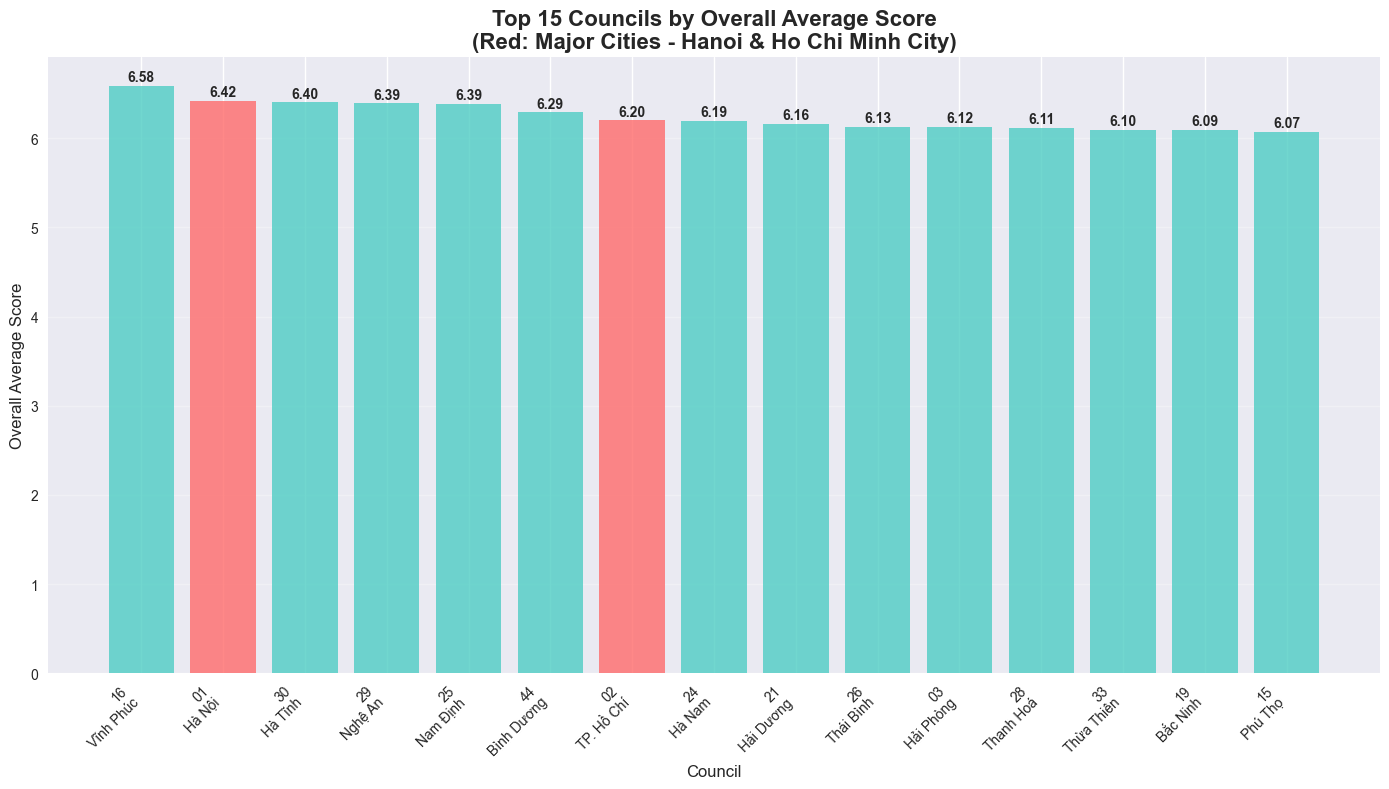

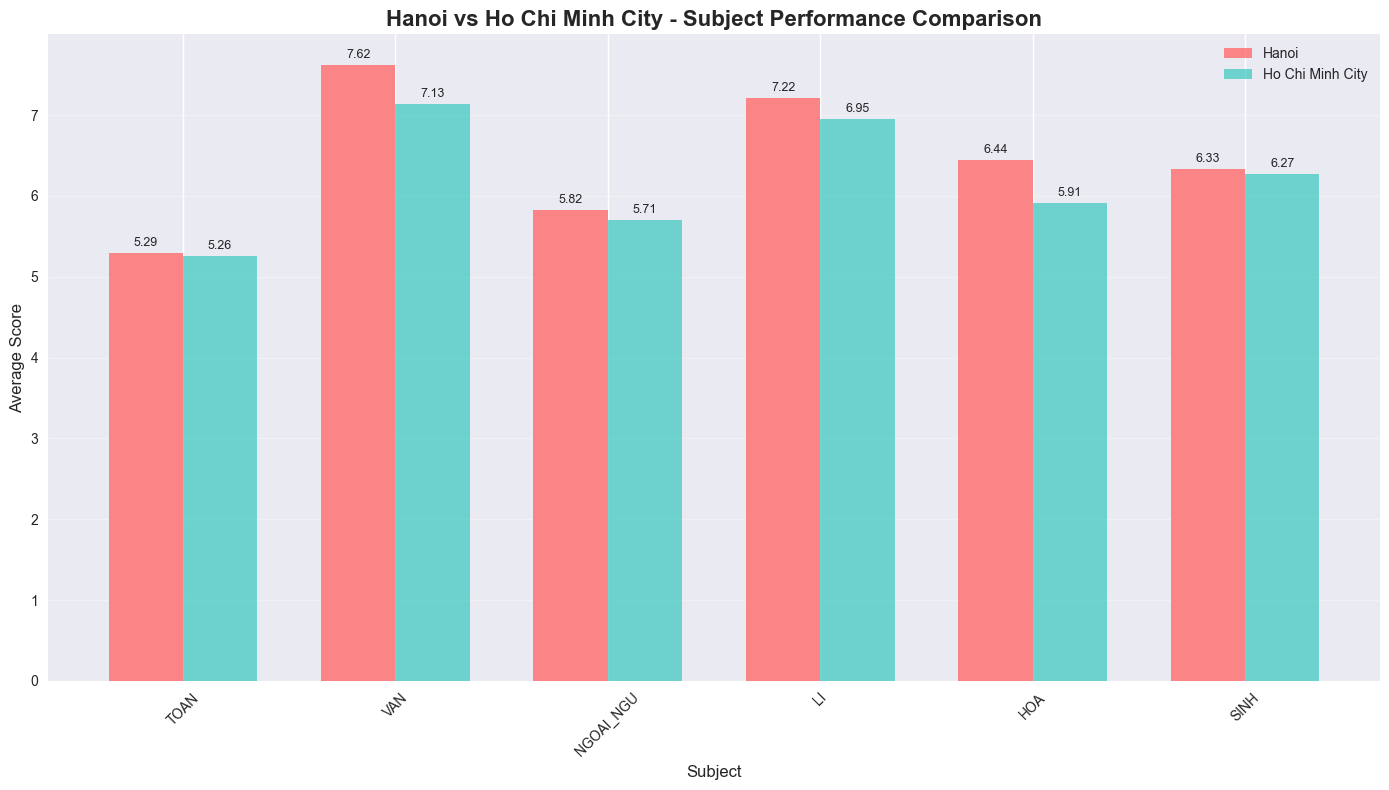


📈 Creating council participation heatmap...


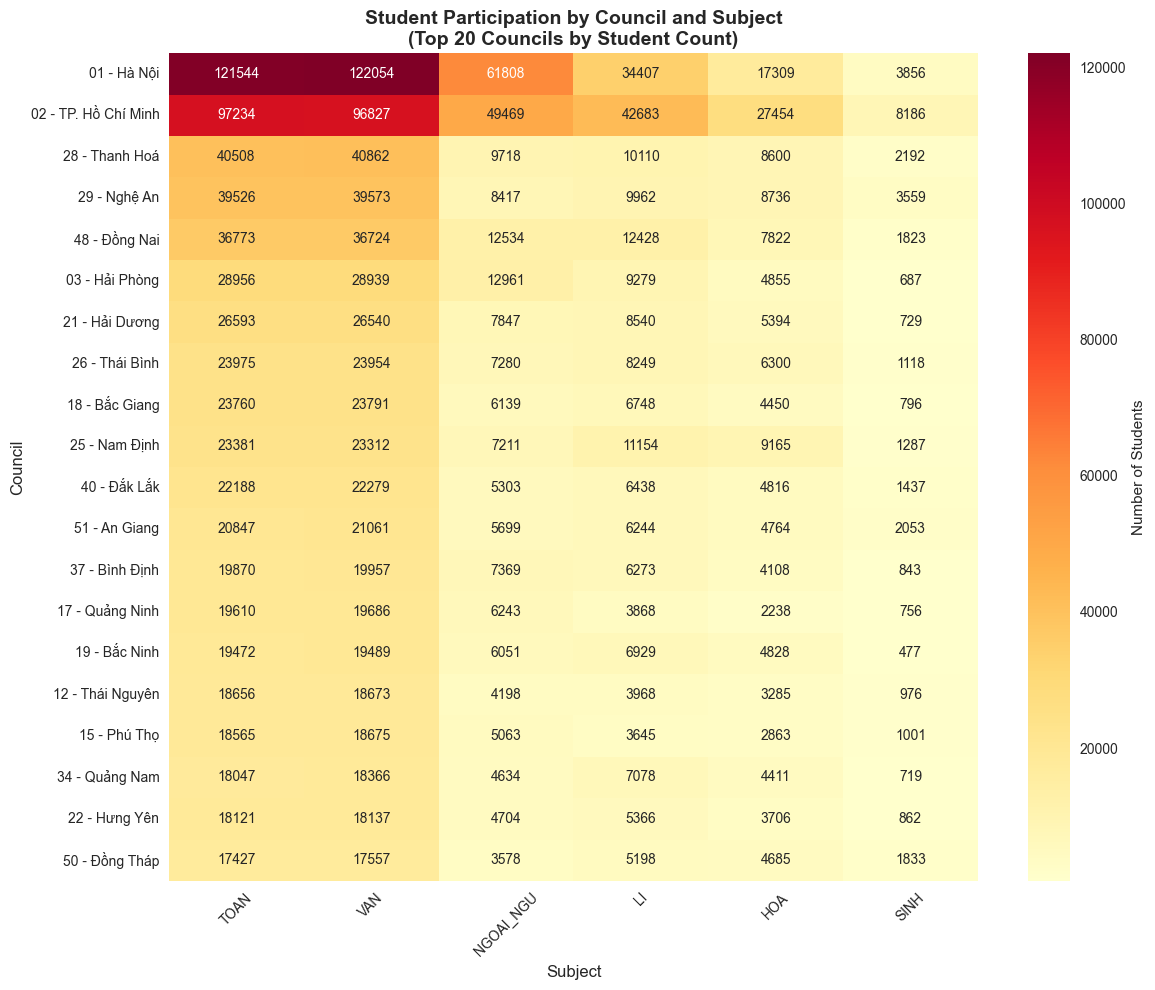

In [32]:
# Create visualizations for council performance
print("📊 Creating council performance visualizations...")

# 1. Top 15 councils by overall performance
plt.figure(figsize=(14, 8))
top_15_councils = performance_df.dropna(subset=['Overall_Avg']).nlargest(15, 'Overall_Avg')

# Highlight major cities
colors = ['#FF6B6B' if code in ['01', '02'] else '#4ECDC4' for code in top_15_councils['Council_Code']]

bars = plt.bar(range(len(top_15_councils)), top_15_councils['Overall_Avg'], color=colors, alpha=0.8)
plt.title('Top 15 Councils by Overall Average Score\n(Red: Major Cities - Hanoi & Ho Chi Minh City)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Council', fontsize=12)
plt.ylabel('Overall Average Score', fontsize=12)

# Add council names
council_labels = [f"{row['Council_Code']}\n{row['Council_Name'][:10]}" for _, row in top_15_councils.iterrows()]
plt.xticks(range(len(top_15_councils)), council_labels, rotation=45, ha='right')

# Add value labels on bars
for i, (bar, avg) in enumerate(zip(bars, top_15_councils['Overall_Avg'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{avg:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 2. Hanoi vs Ho Chi Minh City subject comparison
if len(comparison_df) > 0:
    plt.figure(figsize=(14, 8))
    
    subjects = comparison_df['Subject'].tolist()
    hanoi_scores = comparison_df['Hanoi_Avg'].tolist()
    hcm_scores = comparison_df['HCM_Avg'].tolist()
    
    x = np.arange(len(subjects))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, hanoi_scores, width, label='Hanoi', color='#FF6B6B', alpha=0.8)
    bars2 = plt.bar(x + width/2, hcm_scores, width, label='Ho Chi Minh City', color='#4ECDC4', alpha=0.8)
    
    plt.title('Hanoi vs Ho Chi Minh City - Subject Performance Comparison', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Subject', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.xticks(x, subjects, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, 
                         f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# 3. Council student participation heatmap
print("\n📈 Creating council participation heatmap...")

# Prepare data for heatmap (top 20 councils by student count)
top_20_councils = council_df.nlargest(20, 'Total_Students')
heatmap_data = []

for _, council in top_20_councils.iterrows():
    council_code = council['Council_Code']
    council_data = df_clean[df_clean['Council_Code'] == council_code]
    
    row_data = {'Council': f"{council_code} - {council['Council_Name'][:15]}"}
    for subject in available_major_subjects:
        count = council_data[subject].notna().sum()
        row_data[subject] = count
    
    heatmap_data.append(row_data)

heatmap_df = pd.DataFrame(heatmap_data).set_index('Council')

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Students'})
plt.title('Student Participation by Council and Subject\n(Top 20 Councils by Student Count)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Council', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 11.2 Regional Performance Analysis

Group councils by geographic regions and analyze performance patterns across Vietnam's regions.

🗺️ Regional Performance Analysis:
📊 Regional Performance Summary:


,Region,Councils_Count,Total_Students,Overall_Avg,Total_Score_Records
0,North,23,324054,5.91,883652
1,Central,15,272493,5.95,764885
2,South,20,278319,5.77,808628
3,Major_Cities,5,278042,6.25,854525



📚 Subject Performance by Region:


,Region,TOAN_Avg,VAN_Avg,NGOAI_NGU_Avg,LI_Avg,HOA_Avg,SINH_Avg
0,North,4.73,6.84,5.37,7.12,6.28,5.52
1,Central,4.66,7.10,5.19,6.97,6.12,5.66
2,South,4.58,6.80,5.11,6.76,5.77,5.73
3,Major_Cities,5.23,7.25,5.71,7.07,6.15,6.30


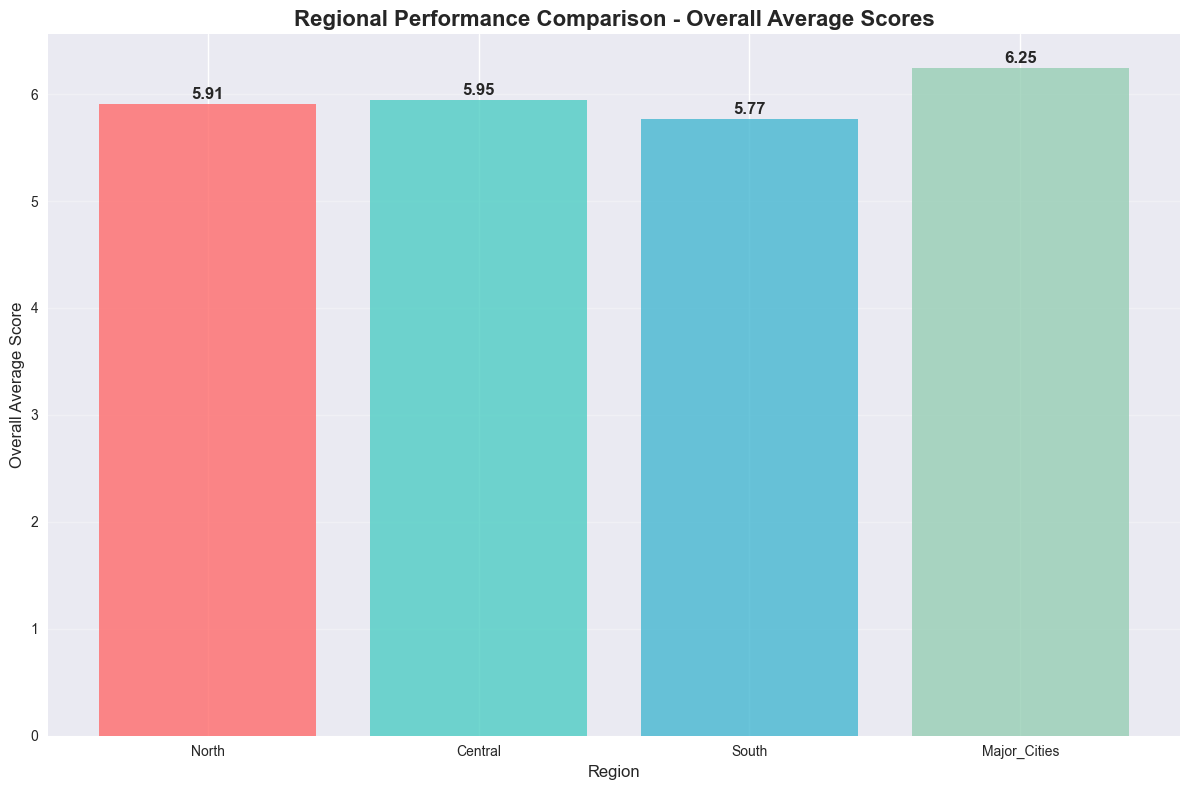


⭐ Perfect Scores Analysis by Region:


,Region,TOAN_Perfect,VAN_Perfect,NGOAI_NGU_Perfect,LI_Perfect,HOA_Perfect,SINH_Perfect
0,North,173,0,163,1088,208,25
1,Central,125,0,37,968,204,15
2,South,45,0,23,623,57,10
3,Major_Cities,170,0,194,1250,158,34


In [33]:
# Define regional groupings for Vietnam using string codes
regional_mapping = {
    # Northern Region
    'North': ['01', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '62'],
    
    # Central Region  
    'Central': ['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42'],
    
    # Southern Region
    'South': ['02', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64'],
    
    # Major Cities (separate category)
    'Major_Cities': ['01', '02', '03', '04', '55'],  # Hanoi, HCM, Hai Phong, Da Nang, Can Tho
    
    # Special
    'Special': ['65']  # Military/Defense Ministry
}

# Create reverse mapping
council_to_region = {}
for region, councils in regional_mapping.items():
    for council in councils:
        if council not in council_to_region:  # Avoid duplicate for major cities
            council_to_region[council] = region

# Override major cities to their own category
for council in regional_mapping['Major_Cities']:
    council_to_region[council] = 'Major_Cities'

# Add region information to dataframe
df_clean['Region'] = df_clean['Council_Code'].map(council_to_region)

print("🗺️ Regional Performance Analysis:")

# Calculate regional statistics
regional_stats = []
for region in ['North', 'Central', 'South', 'Major_Cities']:
    region_data = df_clean[df_clean['Region'] == region]
    
    if len(region_data) > 0:
        regional_info = {
            'Region': region,
            'Total_Students': len(region_data),
            'Councils_Count': region_data['Council_Code'].nunique()
        }
        
        # Calculate average scores for each subject
        for subject in available_major_subjects:
            scores = region_data[subject].dropna()
            if len(scores) > 0:
                regional_info[f'{subject}_Avg'] = scores.mean()
                regional_info[f'{subject}_Count'] = len(scores)
                regional_info[f'{subject}_Perfect'] = (scores == 10).sum()
            else:
                regional_info[f'{subject}_Avg'] = np.nan
                regional_info[f'{subject}_Count'] = 0
                regional_info[f'{subject}_Perfect'] = 0
        
        # Calculate overall average
        all_scores = []
        for subject in available_major_subjects:
            scores = region_data[subject].dropna()
            all_scores.extend(scores.tolist())
        
        regional_info['Overall_Avg'] = np.mean(all_scores) if all_scores else np.nan
        regional_info['Total_Score_Records'] = len(all_scores)
        
        regional_stats.append(regional_info)

regional_df = pd.DataFrame(regional_stats)

print("📊 Regional Performance Summary:")
display_cols = ['Region', 'Councils_Count', 'Total_Students', 'Overall_Avg', 'Total_Score_Records']
display(regional_df[display_cols].round(2))

# Detailed subject comparison by region
print("\n📚 Subject Performance by Region:")
subject_regional = regional_df[['Region'] + [f'{subj}_Avg' for subj in available_major_subjects]]
display(subject_regional.round(2))

# Create regional comparison visualization
plt.figure(figsize=(12, 8))
regions = regional_df['Region'].tolist()
overall_avgs = regional_df['Overall_Avg'].tolist()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(regions, overall_avgs, color=colors, alpha=0.8)

plt.title('Regional Performance Comparison - Overall Average Scores', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Overall Average Score', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, avg in zip(bars, overall_avgs):
    if not np.isnan(avg):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{avg:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Perfect scores by region
print("\n⭐ Perfect Scores Analysis by Region:")
perfect_regional = []
for region in ['North', 'Central', 'South', 'Major_Cities']:
    region_data = df_clean[df_clean['Region'] == region]
    perfect_info = {'Region': region}
    
    for subject in available_major_subjects:
        perfect_count = (region_data[subject] == 10).sum()
        total_count = region_data[subject].notna().sum()
        perfect_rate = (perfect_count / total_count * 100) if total_count > 0 else 0
        perfect_info[f'{subject}_Perfect'] = perfect_count
        perfect_info[f'{subject}_Rate'] = perfect_rate
    
    perfect_regional.append(perfect_info)

perfect_regional_df = pd.DataFrame(perfect_regional)
perfect_display = perfect_regional_df[['Region'] + [f'{subj}_Perfect' for subj in available_major_subjects]]
display(perfect_display)

### 11.3 Major Cities Deep Dive Analysis

Comprehensive analysis focusing on Hanoi (01) and Ho Chi Minh City (02) - Vietnam's two largest educational centers.

🏙️ Major Cities Deep Dive Analysis

📊 Basic Statistics:
🏛️ Hanoi (01): 122,973 total students
🌆 Ho Chi Minh City (02): 97,893 total students

📈 Detailed Performance Comparison:


,Subject,Hanoi_Count,HCM_Count,Hanoi_Mean,HCM_Mean,Mean_Difference,Performance_Leader
0,TOAN,121544,97234,5.292,5.261,0.031,Hanoi
1,VAN,122054,96827,7.616,7.133,0.483,Hanoi
2,NGOAI_NGU,61808,49469,5.821,5.705,0.116,Hanoi
3,LI,34407,42683,7.216,6.952,0.264,Hanoi
4,HOA,17309,27454,6.445,5.910,0.535,Hanoi
5,SINH,3856,8186,6.328,6.267,0.061,Hanoi



⭐ Excellence Analysis (Perfect & Excellent Scores):


,Subject,Hanoi_Perfect,HCM_Perfect,Hanoi_Perfect_Pct,HCM_Perfect_Pct,Hanoi_Excellent_Pct,HCM_Excellent_Pct
0,TOAN,93,28,0.08,0.03,5.27,3.56
1,VAN,0,0,0.00,0.00,30.91,7.86
2,NGOAI_NGU,128,50,0.21,0.10,6.68,4.77
3,LI,556,427,1.62,1.00,26.25,18.02
4,HOA,83,46,0.48,0.17,18.42,12.08
5,SINH,7,20,0.18,0.24,11.75,9.00


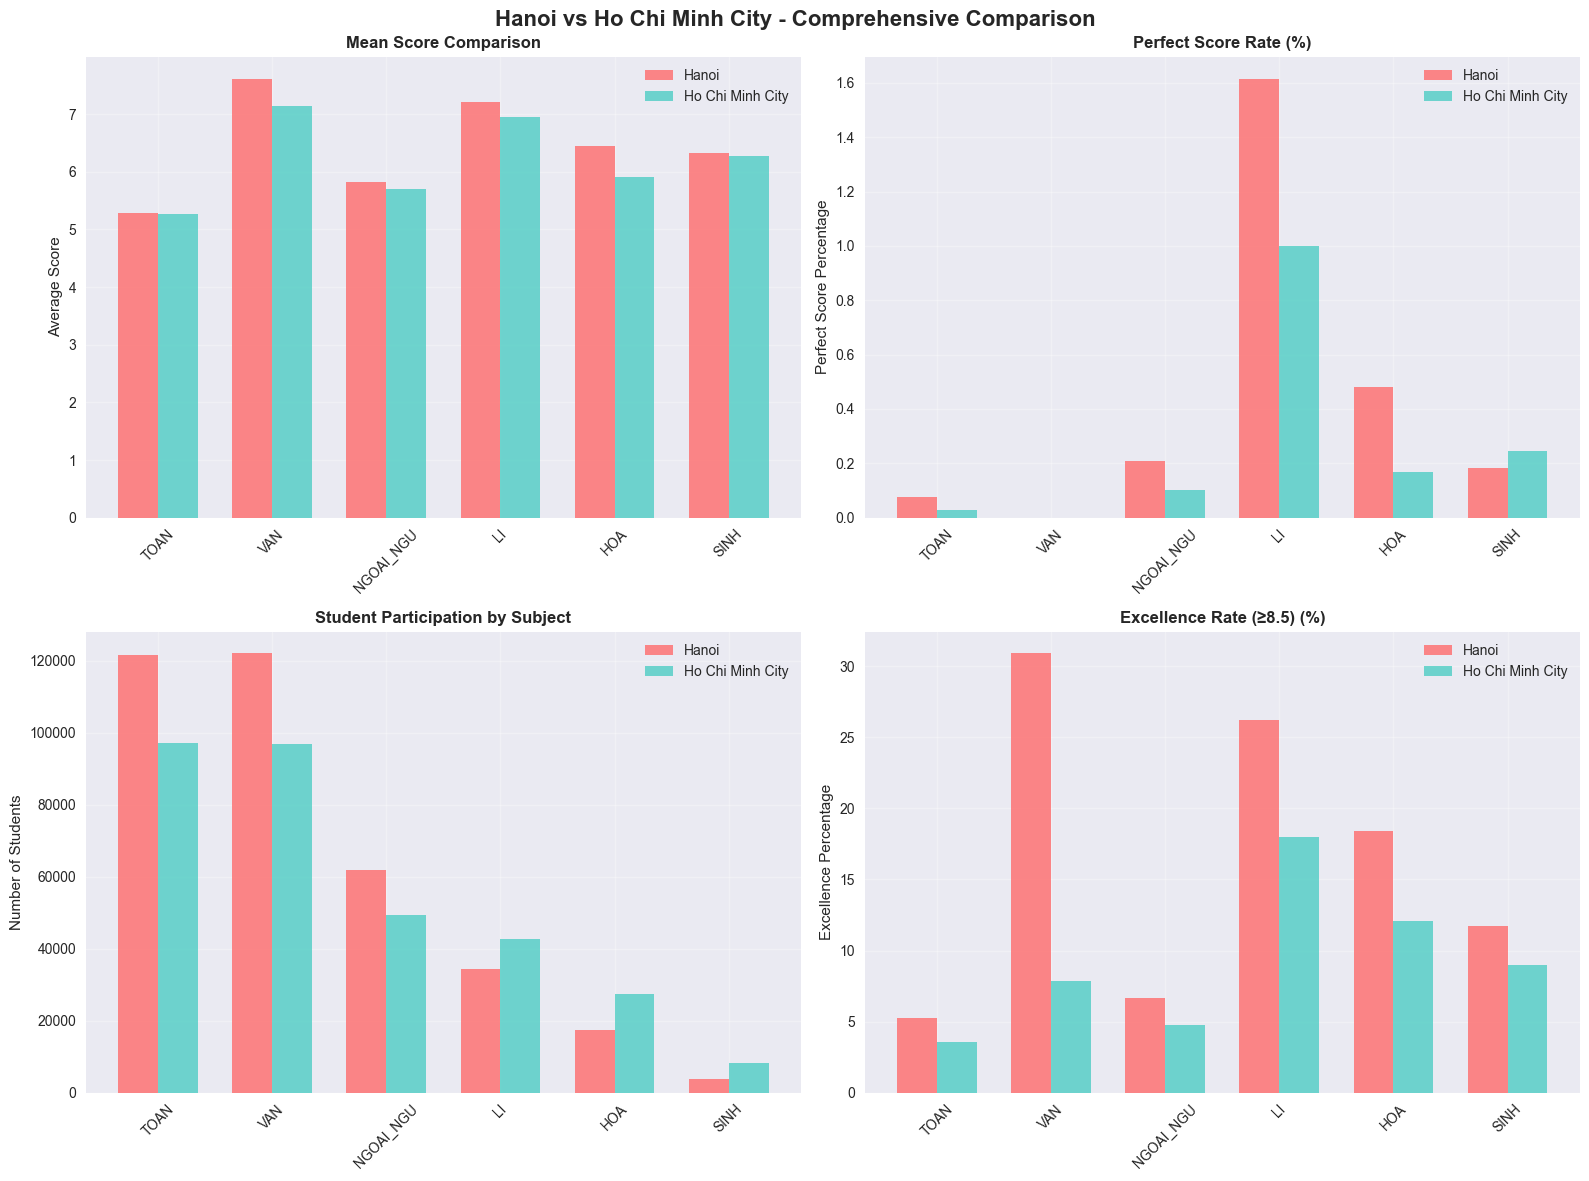


💡 Key Insights - Major Cities Comparison:
📊 Performance Leadership:
   • Hanoi leads in 6 subjects
   • Ho Chi Minh City leads in 0 subjects

🎯 Overall Performance:
   • Hanoi overall average: 6.418
   • Ho Chi Minh City overall average: 6.198
   • Overall leader: Hanoi

⭐ Perfect Score Totals:
   • Hanoi: 867 perfect scores
   • Ho Chi Minh City: 571 perfect scores


In [34]:
# Deep dive analysis of Hanoi and Ho Chi Minh City
print("🏙️ Major Cities Deep Dive Analysis")
print("=" * 50)

hanoi_data = df_clean[df_clean['Council_Code'] == '01']
hcm_data = df_clean[df_clean['Council_Code'] == '02']

print(f"\n📊 Basic Statistics:")
print(f"🏛️ Hanoi (01): {len(hanoi_data):,} total students")
print(f"🌆 Ho Chi Minh City (02): {len(hcm_data):,} total students")

# Calculate comprehensive comparison
detailed_comparison = []
for subject in available_major_subjects:
    hanoi_scores = hanoi_data[subject].dropna()
    hcm_scores = hcm_data[subject].dropna()
    
    if len(hanoi_scores) > 0 and len(hcm_scores) > 0:
        analysis = {
            'Subject': subject,
            
            # Basic stats
            'Hanoi_Count': len(hanoi_scores),
            'HCM_Count': len(hcm_scores),
            'Hanoi_Mean': hanoi_scores.mean(),
            'HCM_Mean': hcm_scores.mean(),
            'Hanoi_Std': hanoi_scores.std(),
            'HCM_Std': hcm_scores.std(),
            
            # Perfect and poor performance
            'Hanoi_Perfect': (hanoi_scores == 10).sum(),
            'HCM_Perfect': (hcm_scores == 10).sum(),
            'Hanoi_Excellent': (hanoi_scores >= 8.5).sum(),
            'HCM_Excellent': (hcm_scores >= 8.5).sum(),
            'Hanoi_Poor': (hanoi_scores < 4.0).sum(),
            'HCM_Poor': (hcm_scores < 4.0).sum(),
            
            # Percentages
            'Hanoi_Perfect_Pct': (hanoi_scores == 10).sum() / len(hanoi_scores) * 100,
            'HCM_Perfect_Pct': (hcm_scores == 10).sum() / len(hcm_scores) * 100,
            'Hanoi_Excellent_Pct': (hanoi_scores >= 8.5).sum() / len(hanoi_scores) * 100,
            'HCM_Excellent_Pct': (hcm_scores >= 8.5).sum() / len(hcm_scores) * 100,
            
            # Advantage analysis
            'Mean_Difference': hanoi_scores.mean() - hcm_scores.mean(),
            'Performance_Leader': 'Hanoi' if hanoi_scores.mean() > hcm_scores.mean() else 'Ho Chi Minh City'
        }
        
        detailed_comparison.append(analysis)

detailed_comp_df = pd.DataFrame(detailed_comparison)

print("\n📈 Detailed Performance Comparison:")
basic_comp = detailed_comp_df[['Subject', 'Hanoi_Count', 'HCM_Count', 'Hanoi_Mean', 'HCM_Mean', 'Mean_Difference', 'Performance_Leader']]
display(basic_comp.round(3))

print("\n⭐ Excellence Analysis (Perfect & Excellent Scores):")
excellence_comp = detailed_comp_df[['Subject', 'Hanoi_Perfect', 'HCM_Perfect', 'Hanoi_Perfect_Pct', 'HCM_Perfect_Pct', 'Hanoi_Excellent_Pct', 'HCM_Excellent_Pct']]
display(excellence_comp.round(2))

# Create detailed comparison visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mean score comparison
subjects = detailed_comp_df['Subject'].tolist()
hanoi_means = detailed_comp_df['Hanoi_Mean'].tolist()
hcm_means = detailed_comp_df['HCM_Mean'].tolist()

x = np.arange(len(subjects))
width = 0.35

ax1.bar(x - width/2, hanoi_means, width, label='Hanoi', color='#FF6B6B', alpha=0.8)
ax1.bar(x + width/2, hcm_means, width, label='Ho Chi Minh City', color='#4ECDC4', alpha=0.8)
ax1.set_title('Mean Score Comparison', fontweight='bold')
ax1.set_ylabel('Average Score')
ax1.set_xticks(x)
ax1.set_xticklabels(subjects, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Perfect score percentages
hanoi_perfect_pct = detailed_comp_df['Hanoi_Perfect_Pct'].tolist()
hcm_perfect_pct = detailed_comp_df['HCM_Perfect_Pct'].tolist()

ax2.bar(x - width/2, hanoi_perfect_pct, width, label='Hanoi', color='#FF6B6B', alpha=0.8)
ax2.bar(x + width/2, hcm_perfect_pct, width, label='Ho Chi Minh City', color='#4ECDC4', alpha=0.8)
ax2.set_title('Perfect Score Rate (%)', fontweight='bold')
ax2.set_ylabel('Perfect Score Percentage')
ax2.set_xticks(x)
ax2.set_xticklabels(subjects, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Student participation comparison
hanoi_counts = detailed_comp_df['Hanoi_Count'].tolist()
hcm_counts = detailed_comp_df['HCM_Count'].tolist()

ax3.bar(x - width/2, hanoi_counts, width, label='Hanoi', color='#FF6B6B', alpha=0.8)
ax3.bar(x + width/2, hcm_counts, width, label='Ho Chi Minh City', color='#4ECDC4', alpha=0.8)
ax3.set_title('Student Participation by Subject', fontweight='bold')
ax3.set_ylabel('Number of Students')
ax3.set_xticks(x)
ax3.set_xticklabels(subjects, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Excellence rate comparison
hanoi_excellent_pct = detailed_comp_df['Hanoi_Excellent_Pct'].tolist()
hcm_excellent_pct = detailed_comp_df['HCM_Excellent_Pct'].tolist()

ax4.bar(x - width/2, hanoi_excellent_pct, width, label='Hanoi', color='#FF6B6B', alpha=0.8)
ax4.bar(x + width/2, hcm_excellent_pct, width, label='Ho Chi Minh City', color='#4ECDC4', alpha=0.8)
ax4.set_title('Excellence Rate (≥8.5) (%)', fontweight='bold')
ax4.set_ylabel('Excellence Percentage')
ax4.set_xticks(x)
ax4.set_xticklabels(subjects, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Hanoi vs Ho Chi Minh City - Comprehensive Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary insights
print("\n💡 Key Insights - Major Cities Comparison:")
hanoi_wins = (detailed_comp_df['Performance_Leader'] == 'Hanoi').sum()
hcm_wins = (detailed_comp_df['Performance_Leader'] == 'Ho Chi Minh City').sum()

print(f"📊 Performance Leadership:")
print(f"   • Hanoi leads in {hanoi_wins} subjects")
print(f"   • Ho Chi Minh City leads in {hcm_wins} subjects")

# Overall averages
hanoi_overall = np.mean([score for scores in [hanoi_data[subj].dropna() for subj in available_major_subjects] for score in scores])
hcm_overall = np.mean([score for scores in [hcm_data[subj].dropna() for subj in available_major_subjects] for score in scores])

print(f"\n🎯 Overall Performance:")
print(f"   • Hanoi overall average: {hanoi_overall:.3f}")
print(f"   • Ho Chi Minh City overall average: {hcm_overall:.3f}")
print(f"   • Overall leader: {'Hanoi' if hanoi_overall > hcm_overall else 'Ho Chi Minh City'}")

# Perfect score totals
hanoi_total_perfect = sum(detailed_comp_df['Hanoi_Perfect'])
hcm_total_perfect = sum(detailed_comp_df['HCM_Perfect'])
print(f"\n⭐ Perfect Score Totals:")
print(f"   • Hanoi: {hanoi_total_perfect} perfect scores")
print(f"   • Ho Chi Minh City: {hcm_total_perfect} perfect scores")

### 11.4 Council Analysis Summary

Key findings and insights from the comprehensive council and regional performance analysis.

In [35]:
# Council Analysis Summary Report
print("📋 COUNCIL & REGIONAL ANALYSIS SUMMARY")
print("=" * 50)

print(f"\n🗺️ GEOGRAPHIC COVERAGE:")
total_councils = len(council_stats)
print(f"• Total councils analyzed: {total_councils}")
print(f"• Students across Vietnam: {len(df_clean):,}")

if 'Region' in df_clean.columns:
    region_counts = df_clean['Region'].value_counts()
    for region, count in region_counts.items():
        if region and str(region) != 'nan':
            print(f"• {region}: {count:,} students")

print(f"\n🏆 TOP PERFORMING COUNCILS:")
if len(performance_df) > 0:
    top_5_overall = performance_df.dropna(subset=['Overall_Avg']).nlargest(5, 'Overall_Avg')
    for i, (_, council) in enumerate(top_5_overall.iterrows(), 1):
        print(f"{i}. {council['Council_Name']} (Code: {council['Council_Code']}) - {council['Overall_Avg']:.2f} avg")

print(f"\n🏙️ MAJOR CITIES COMPARISON:")
if len(detailed_comparison) > 0:
    hanoi_subjects_led = sum(1 for comp in detailed_comparison if comp['Performance_Leader'] == 'Hanoi')
    hcm_subjects_led = sum(1 for comp in detailed_comparison if comp['Performance_Leader'] == 'Ho Chi Minh City')
    
    print(f"• Hanoi leads in {hanoi_subjects_led}/{len(detailed_comparison)} subjects")
    print(f"• Ho Chi Minh City leads in {hcm_subjects_led}/{len(detailed_comparison)} subjects")
    
    # Calculate which city has more total perfect scores
    hanoi_perfect_total = sum(comp['Hanoi_Perfect'] for comp in detailed_comparison)
    hcm_perfect_total = sum(comp['HCM_Perfect'] for comp in detailed_comparison)
    
    print(f"• Perfect scores: Hanoi ({hanoi_perfect_total}) vs HCM ({hcm_perfect_total})")

print(f"\n📊 REGIONAL INSIGHTS:")
if len(regional_df) > 0:
    best_region = regional_df.loc[regional_df['Overall_Avg'].idxmax()]
    print(f"• Highest performing region: {best_region['Region']} ({best_region['Overall_Avg']:.2f} avg)")
    
    largest_region = regional_df.loc[regional_df['Total_Students'].idxmax()]
    print(f"• Largest student population: {largest_region['Region']} ({largest_region['Total_Students']:,} students)")

print(f"\n📈 EDUCATIONAL EQUITY INSIGHTS:")
if len(performance_df) > 0:
    # Calculate performance gap
    valid_councils = performance_df.dropna(subset=['Overall_Avg'])
    if len(valid_councils) > 0:
        highest_avg = valid_councils['Overall_Avg'].max()
        lowest_avg = valid_councils['Overall_Avg'].min()
        performance_gap = highest_avg - lowest_avg
        
        print(f"• Performance gap between councils: {performance_gap:.2f} points")
        print(f"• Highest council average: {highest_avg:.2f}")
        print(f"• Lowest council average: {lowest_avg:.2f}")
        
        # Standard deviation of council averages
        std_councils = valid_councils['Overall_Avg'].std()
        print(f"• Council performance variation (std): {std_councils:.2f}")

print(f"\n💡 KEY RECOMMENDATIONS:")
print("• Focus resources on lower-performing councils to reduce educational gaps")
print("• Share best practices from top-performing councils")
print("• Investigate factors contributing to major cities' performance differences")
print("• Consider regional development programs for educational equity")
print("• Monitor perfect score distribution for talent development programs")

print(f"\n✅ Council analysis completed successfully!")

📋 COUNCIL & REGIONAL ANALYSIS SUMMARY

🗺️ GEOGRAPHIC COVERAGE:
• Total councils analyzed: 63
• Students across Vietnam: 1,152,908
• North: 324,054 students
• South: 278,319 students
• Major_Cities: 278,042 students
• Central: 272,493 students

🏆 TOP PERFORMING COUNCILS:
1. Vĩnh Phúc (Code: 16) - 6.58 avg
2. Hà Nội (Code: 01) - 6.42 avg
3. Hà Tĩnh (Code: 30) - 6.40 avg
4. Nghệ An (Code: 29) - 6.39 avg
5. Nam Định (Code: 25) - 6.39 avg

🏙️ MAJOR CITIES COMPARISON:
• Hanoi leads in 6/6 subjects
• Ho Chi Minh City leads in 0/6 subjects
• Perfect scores: Hanoi (867) vs HCM (571)

📊 REGIONAL INSIGHTS:
• Highest performing region: Major_Cities (6.25 avg)
• Largest student population: North (324,054 students)

📈 EDUCATIONAL EQUITY INSIGHTS:
• Performance gap between councils: 1.78 points
• Highest council average: 6.58
• Lowest council average: 4.80
• Council performance variation (std): 0.36

💡 KEY RECOMMENDATIONS:
• Focus resources on lower-performing councils to reduce educational gaps
• Sh